In [37]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

%matplotlib inline

In [42]:
# Load the iris dataset
iris_data = load_iris()
X = iris_data.data  # Assign the features to variable X

# Sample targets
sample_targets = iris_data.target[[10, 25, 50]]

# Target names
target_names = list(iris_data.target_names)

# Normalize the data
scaler = StandardScaler()
normalized_iris_data = scaler.fit_transform(X)

# KMeans clustering on original data
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(X)  # Use X instead of iris_df
original_labels = kmeans_original.labels_

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# KMeans clustering on normalized data
kmeans_normalized = KMeans(n_clusters=3, random_state=42)
kmeans_normalized.fit(X_normalized)
normalized_labels = kmeans_normalized.labels_

# Compare clustering results
print("Original Labels:", original_labels)
print("Normalized Labels:", normalized_labels)



Original Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Normalized Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


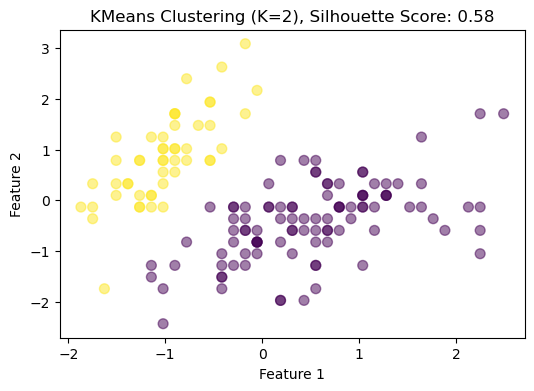

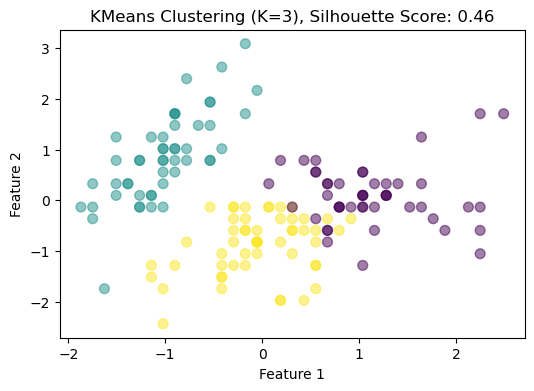

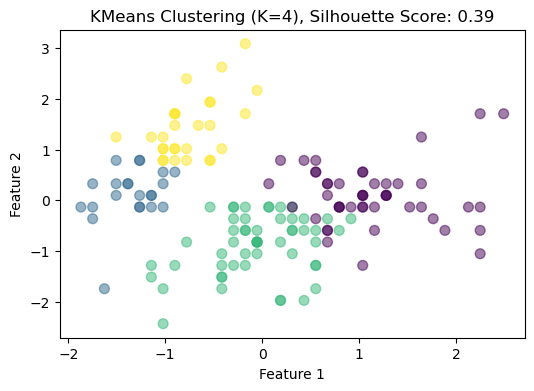

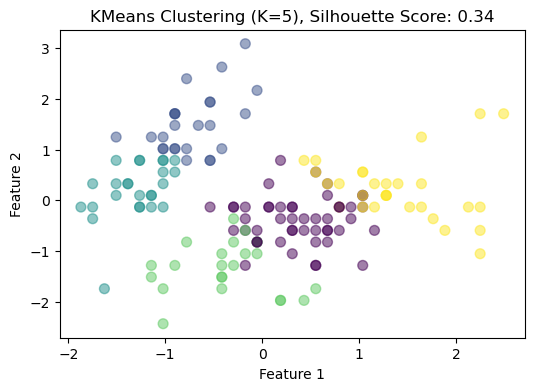

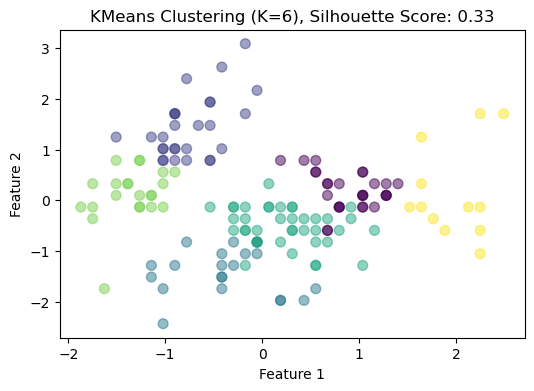

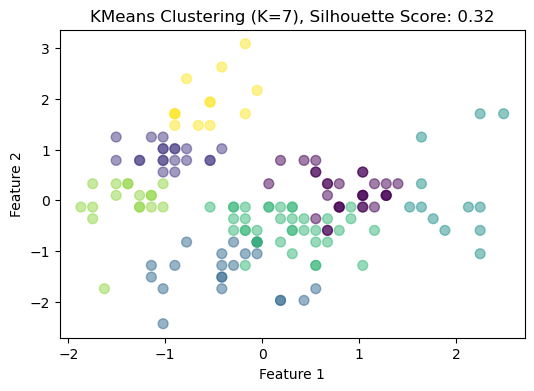

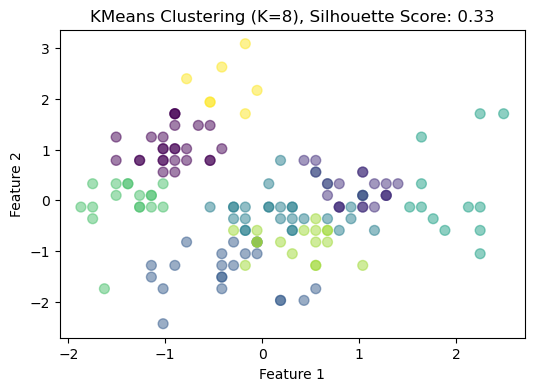

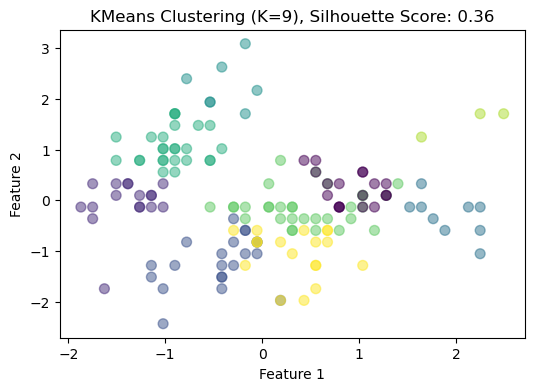

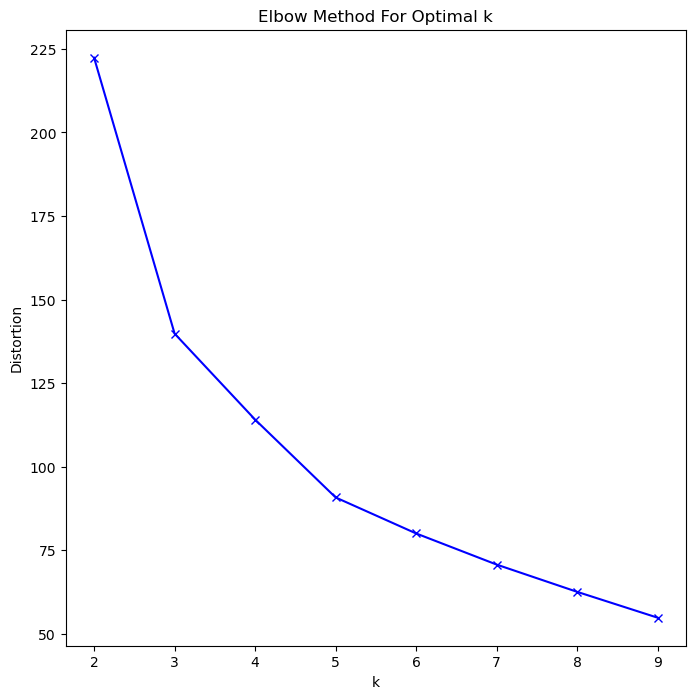

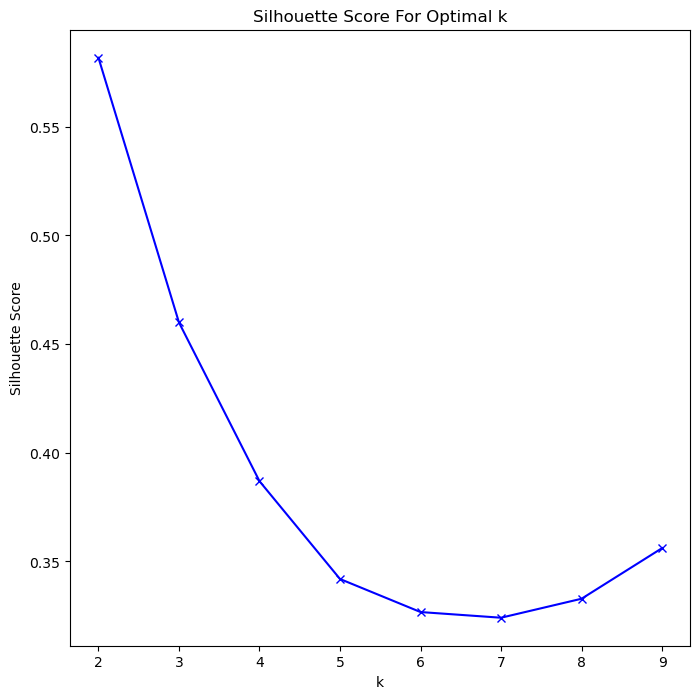

In [69]:
# Perform KMeans clustering
distortions = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_normalized, kmeans.labels_))

    # Plot clusters
    plt.figure(figsize=(6, 4))
    plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
    plt.title(f'KMeans Clustering (K={k}), Silhouette Score: {silhouette_scores[-1]:.2f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot distortion function
plt.plot(K_range, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot silhouette score
plt.plot(K_range, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()



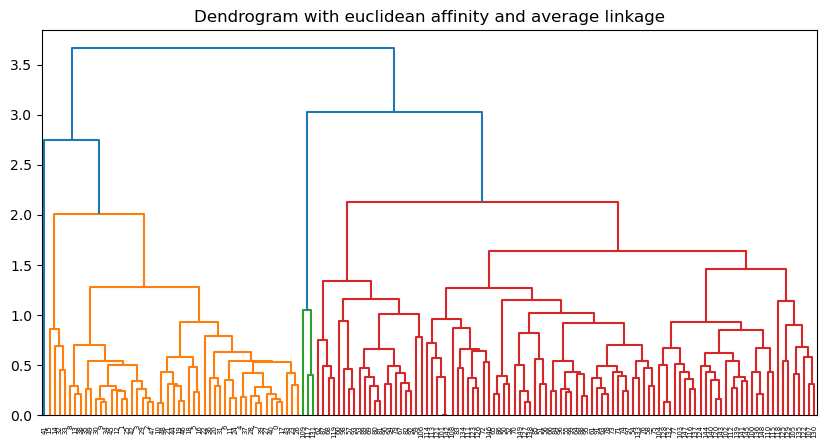

Silhouette Score with euclidean affinity and average linkage: 0.5817500491982808


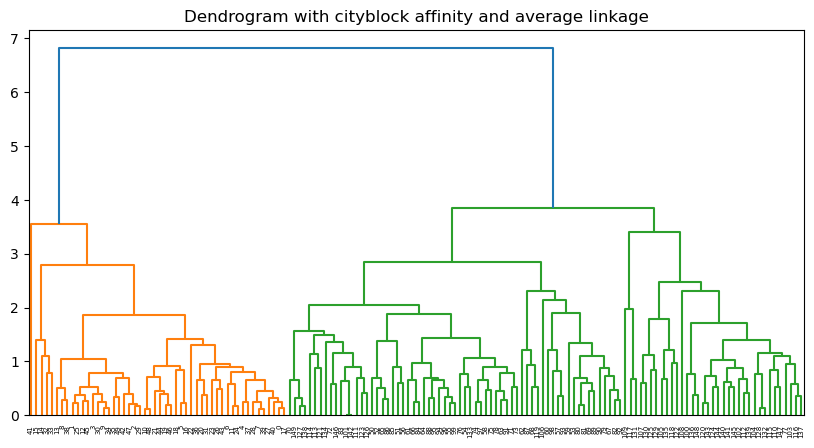

Silhouette Score with cityblock affinity and average linkage: 0.5817500491982808


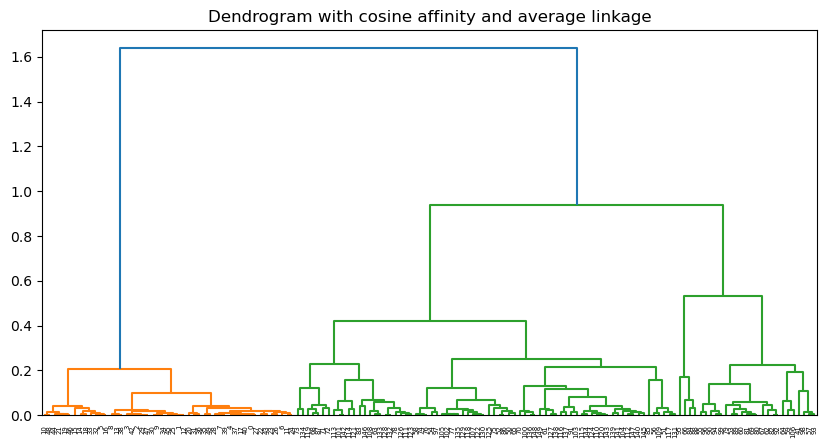

Silhouette Score with cosine affinity and average linkage: 0.5770346019475988


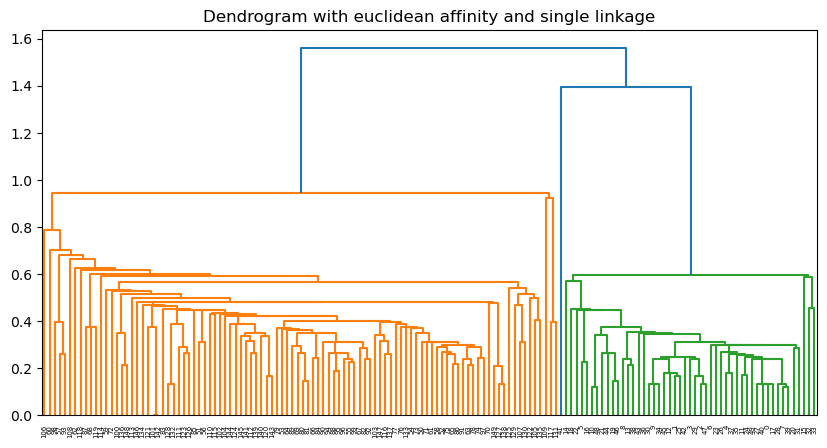

Silhouette Score with euclidean affinity and single linkage: 0.5817500491982808


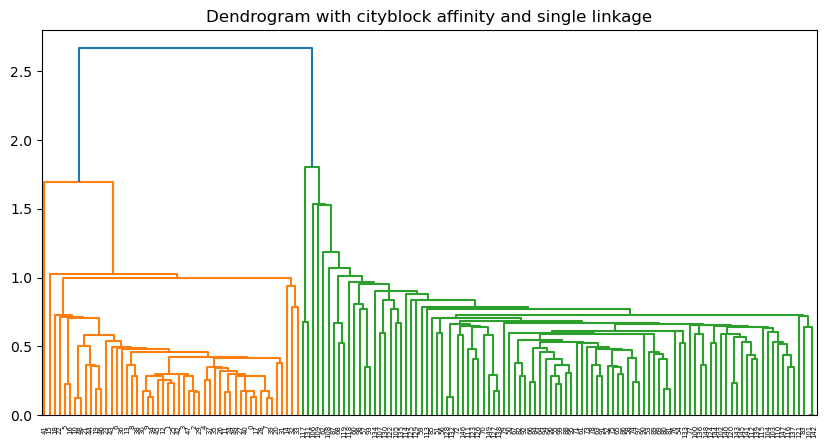

Silhouette Score with cityblock affinity and single linkage: 0.5817500491982808


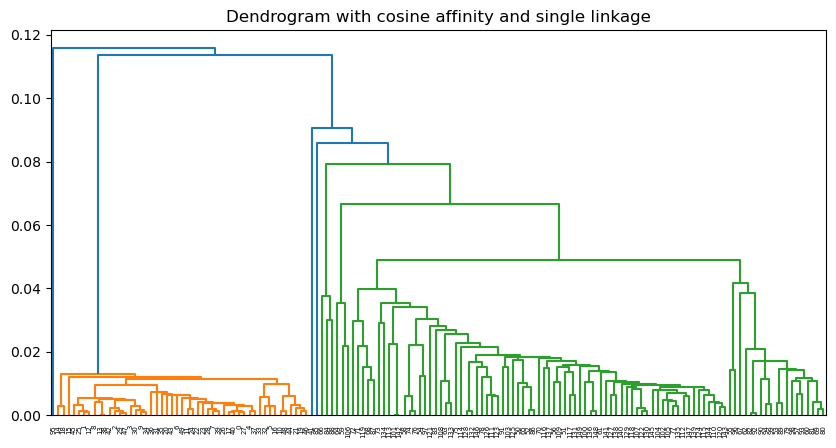

Silhouette Score with cosine affinity and single linkage: -0.28457176212314245
Best Parameters: {'affinity': 'euclidean', 'linkage': 'average'}
Best Silhouette Score: 0.5817500491982808


In [57]:
# Perform Hierarchical Clustering
def perform_hierarchical_clustering(data):
    # Try different parameters
    parameters = [
        {'affinity': 'euclidean', 'linkage': 'average'},
        {'affinity': 'cityblock', 'linkage': 'average'},  # Change to cityblock
        {'affinity': 'cosine', 'linkage': 'average'},
        {'affinity': 'euclidean', 'linkage': 'single'},
        {'affinity': 'cityblock', 'linkage': 'single'},   # Change to cityblock
        {'affinity': 'cosine', 'linkage': 'single'}
    ]
    best_silhouette_score = -1
    best_params = None

    for param in parameters:
        model = AgglomerativeClustering(affinity=param['affinity'], linkage=param['linkage'])
        labels = model.fit_predict(data)
        silhouette_score_value = silhouette_score(data, labels)
        if silhouette_score_value > best_silhouette_score:
            best_silhouette_score = silhouette_score_value
            best_params = param

        # Compute linkage matrix
        Z = linkage(data, method=param['linkage'], metric=param['affinity'])

        # Plot dendrogram
        plt.figure(figsize=(10, 5))
        dendrogram(Z)
        plt.title(f"Dendrogram with {param['affinity']} affinity and {param['linkage']} linkage")
        plt.show()

        print(f"Silhouette Score with {param['affinity']} affinity and {param['linkage']} linkage: {silhouette_score_value}")

    return best_params, best_silhouette_score
# Main
best_params, best_silhouette_score = perform_hierarchical_clustering(X_normalized)

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_silhouette_score)


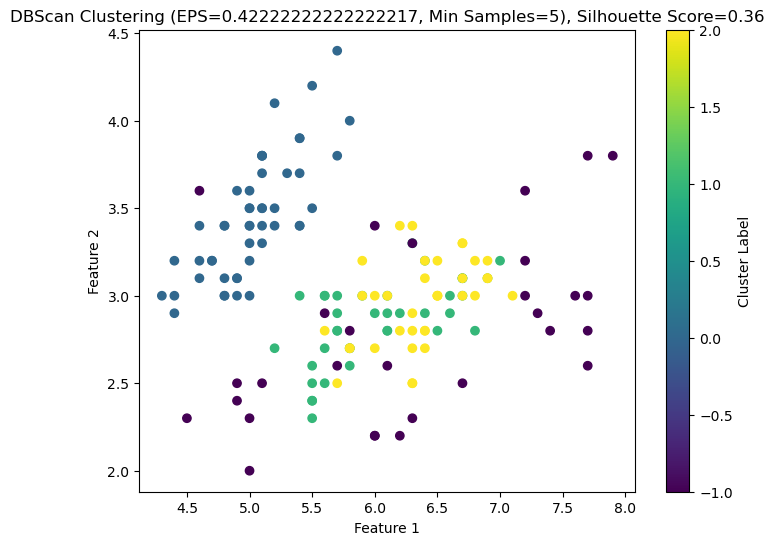

EPS: 0.42222222222222217, Min Samples: 5, Silhouette Score: 0.36


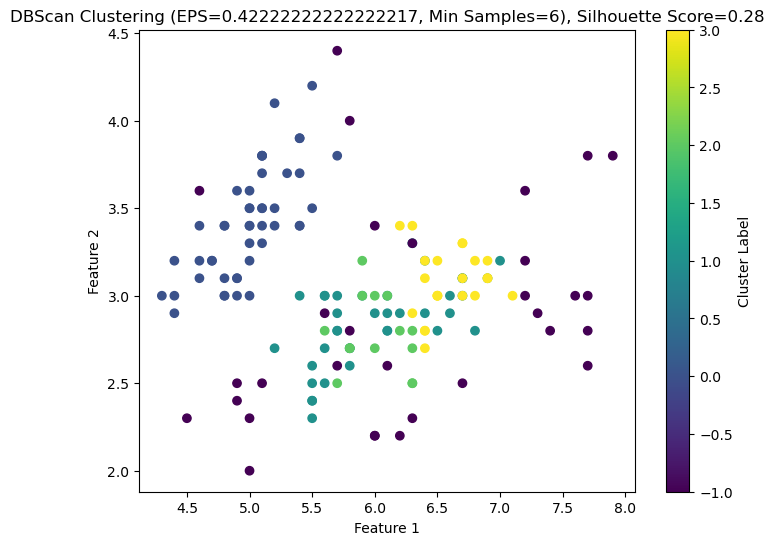

EPS: 0.42222222222222217, Min Samples: 6, Silhouette Score: 0.28


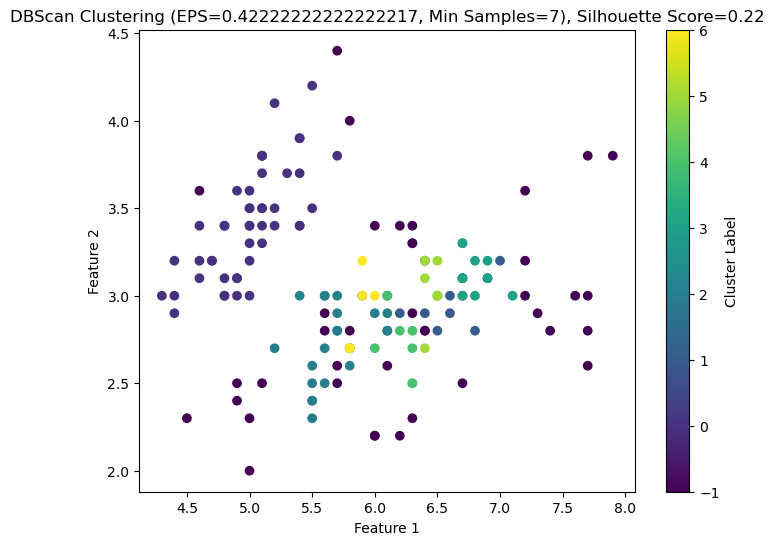

EPS: 0.42222222222222217, Min Samples: 7, Silhouette Score: 0.22


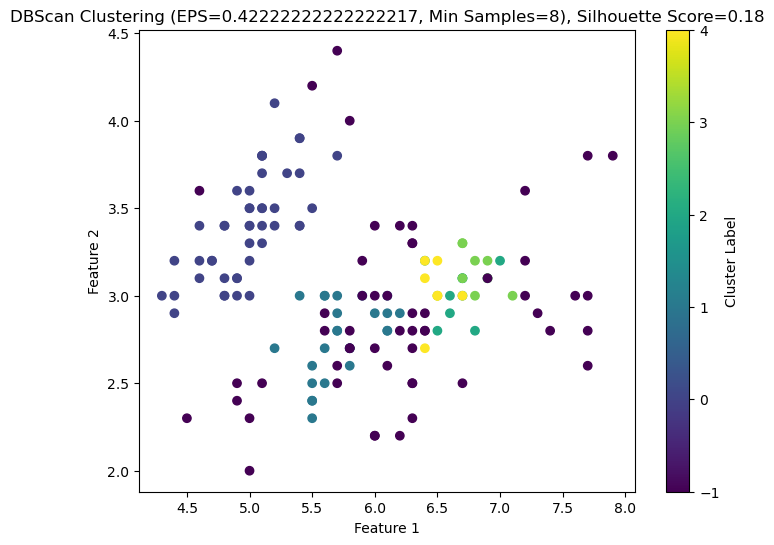

EPS: 0.42222222222222217, Min Samples: 8, Silhouette Score: 0.18


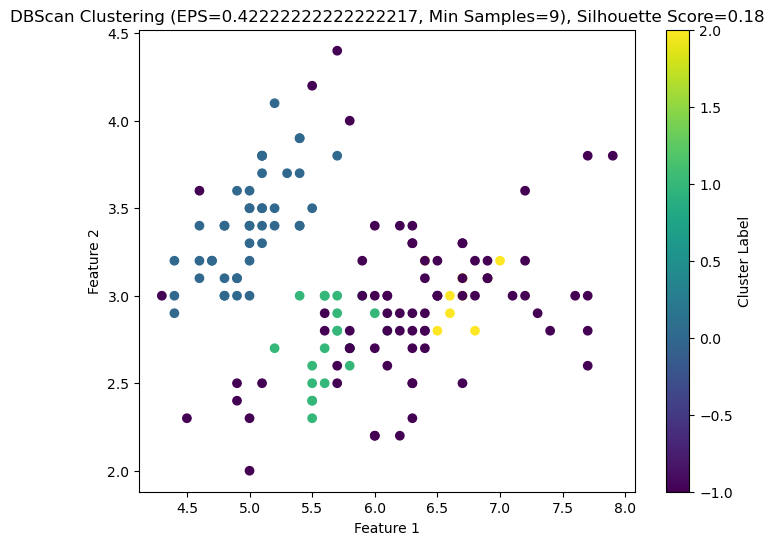

EPS: 0.42222222222222217, Min Samples: 9, Silhouette Score: 0.18


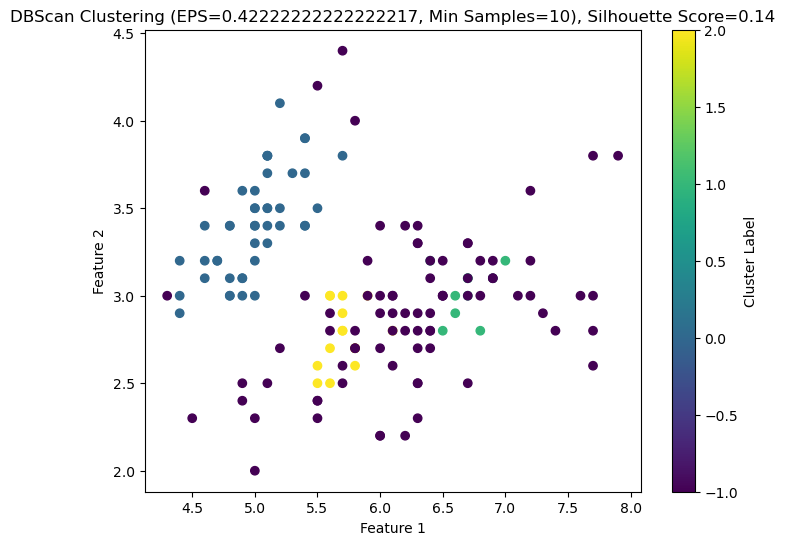

EPS: 0.42222222222222217, Min Samples: 10, Silhouette Score: 0.14


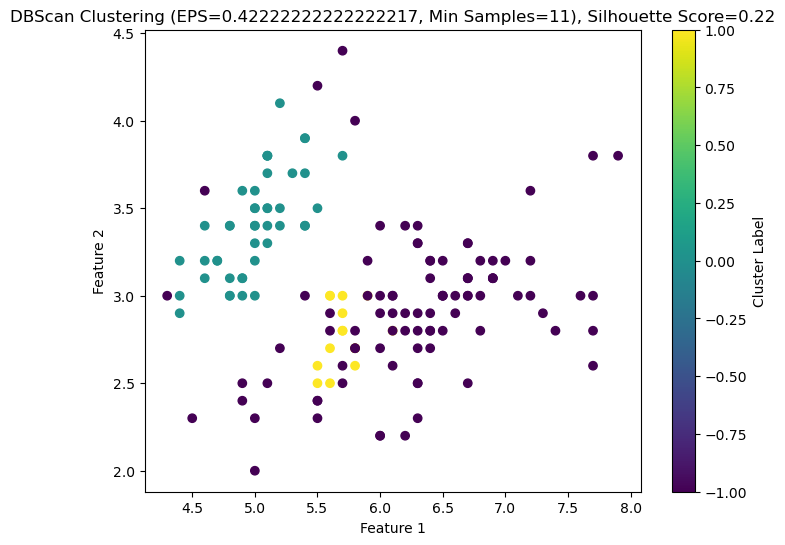

EPS: 0.42222222222222217, Min Samples: 11, Silhouette Score: 0.22


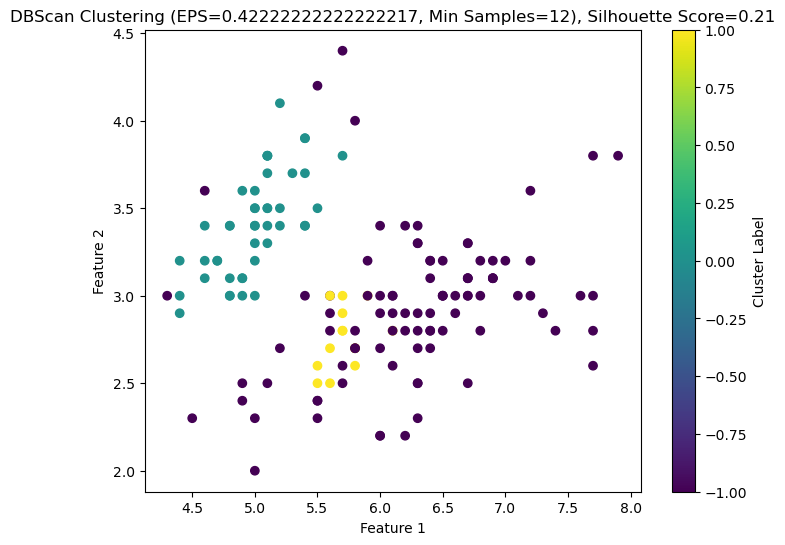

EPS: 0.42222222222222217, Min Samples: 12, Silhouette Score: 0.21


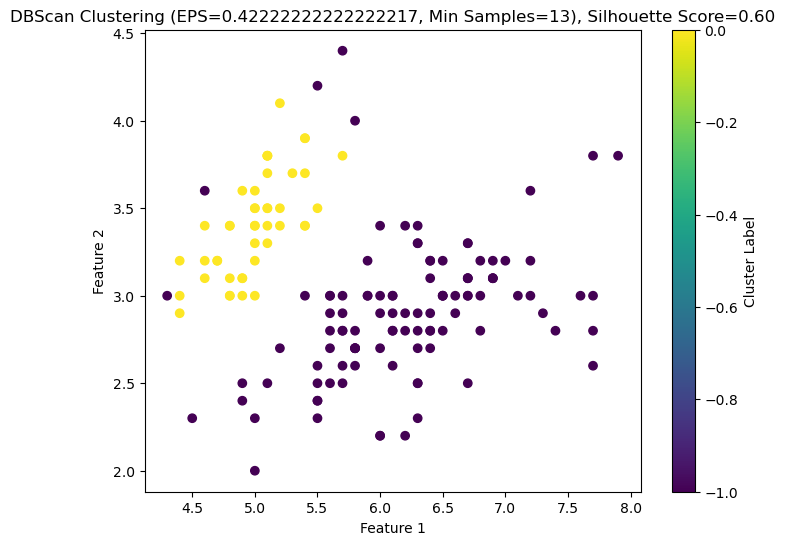

EPS: 0.42222222222222217, Min Samples: 13, Silhouette Score: 0.60


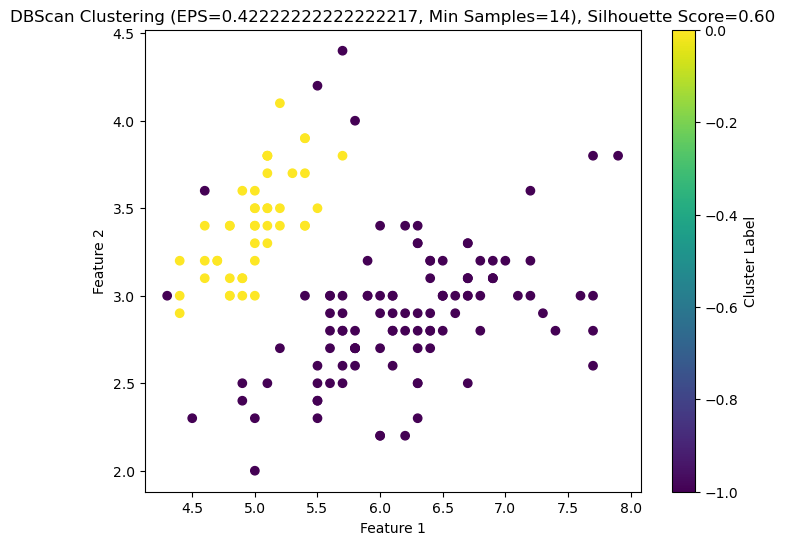

EPS: 0.42222222222222217, Min Samples: 14, Silhouette Score: 0.60


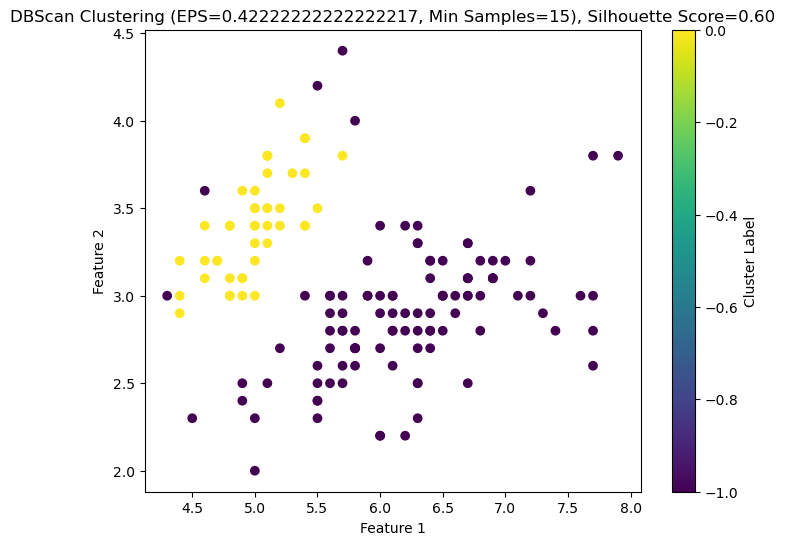

EPS: 0.42222222222222217, Min Samples: 15, Silhouette Score: 0.60


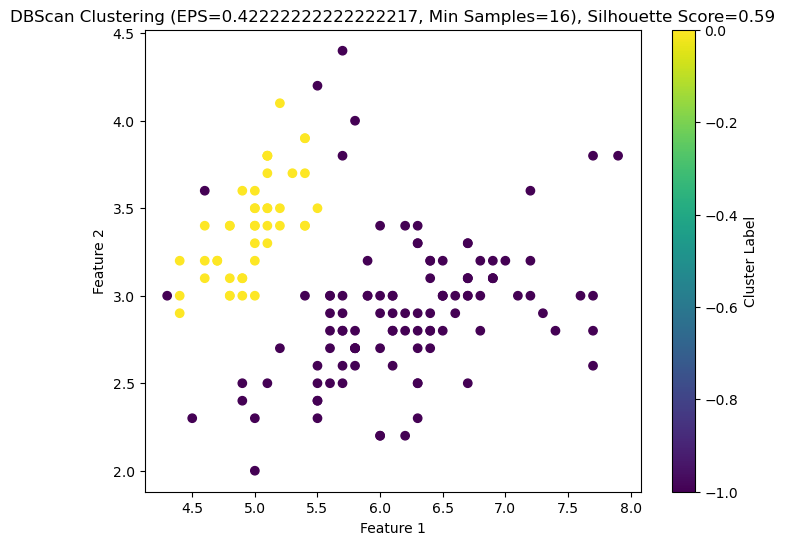

EPS: 0.42222222222222217, Min Samples: 16, Silhouette Score: 0.59


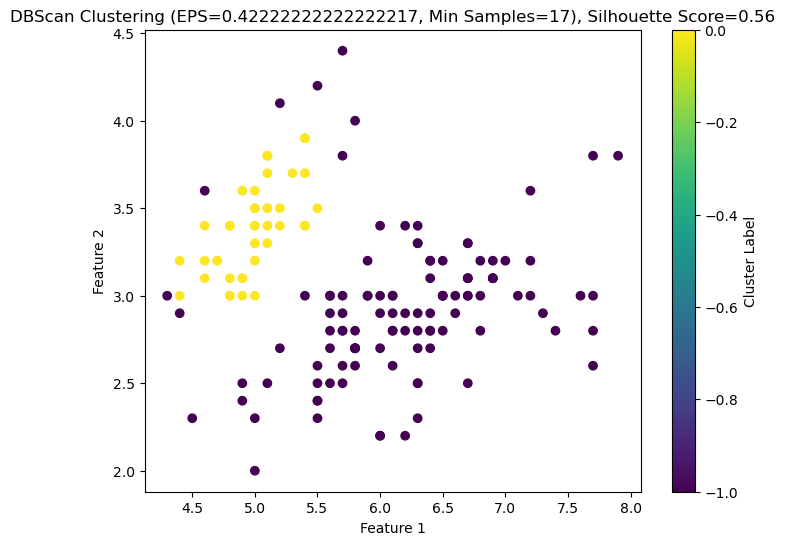

EPS: 0.42222222222222217, Min Samples: 17, Silhouette Score: 0.56


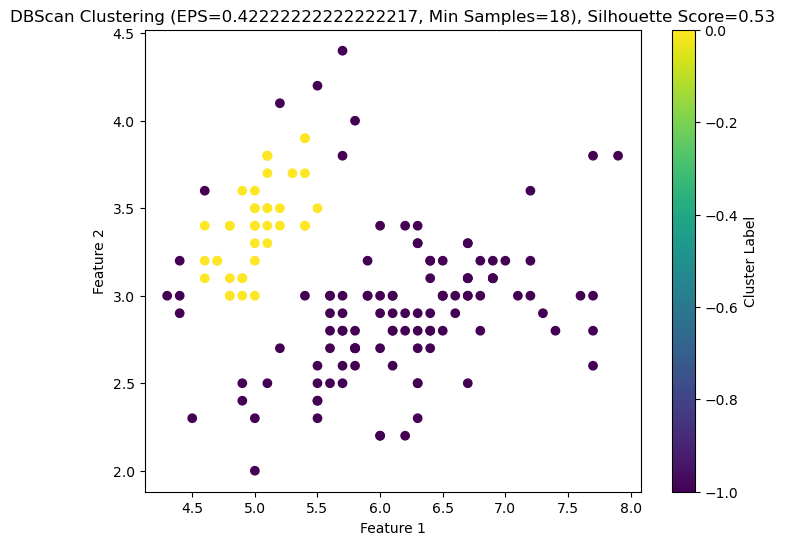

EPS: 0.42222222222222217, Min Samples: 18, Silhouette Score: 0.53


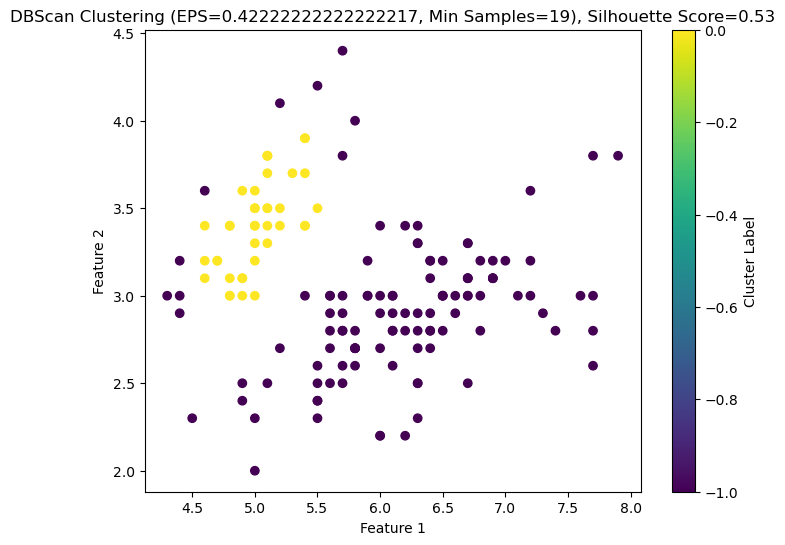

EPS: 0.42222222222222217, Min Samples: 19, Silhouette Score: 0.53


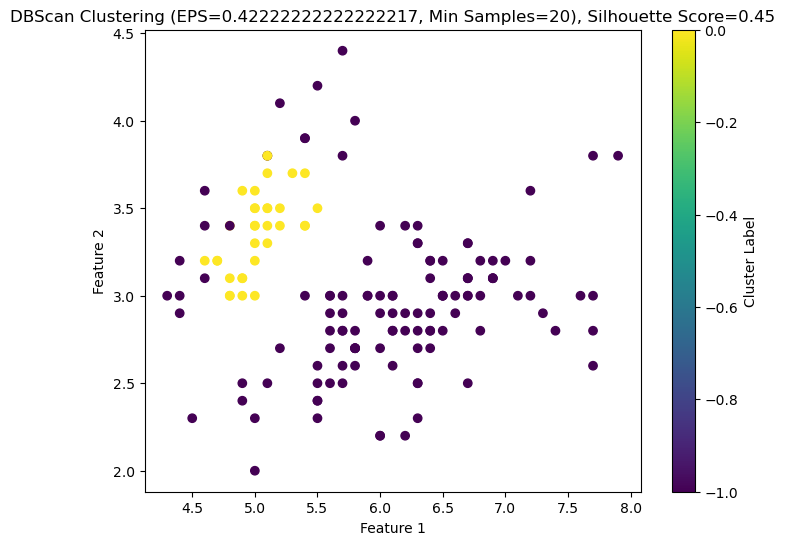

EPS: 0.42222222222222217, Min Samples: 20, Silhouette Score: 0.45


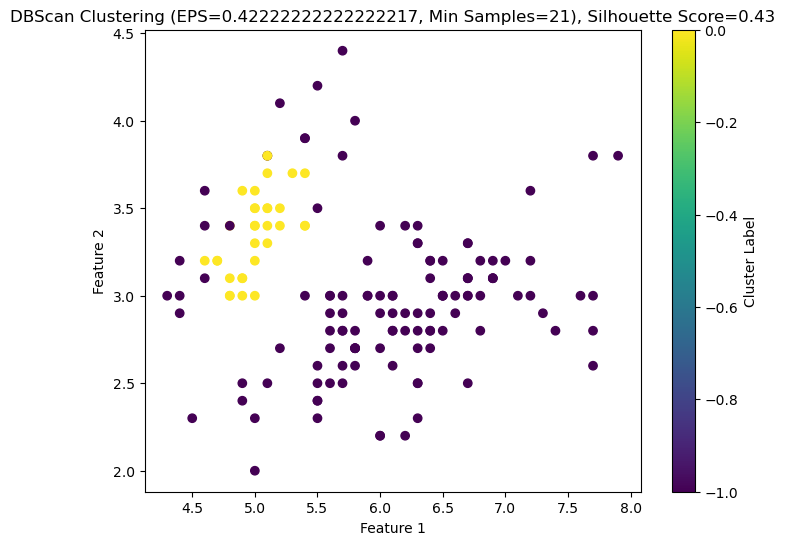

EPS: 0.42222222222222217, Min Samples: 21, Silhouette Score: 0.43


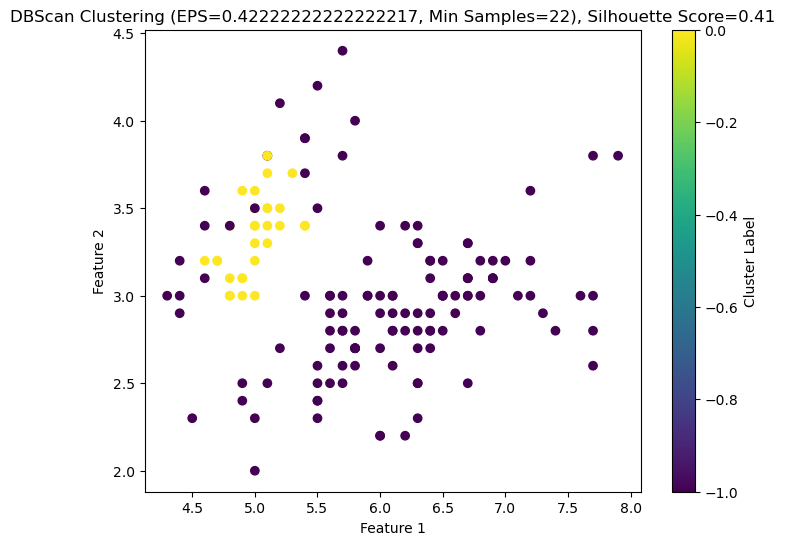

EPS: 0.42222222222222217, Min Samples: 22, Silhouette Score: 0.41


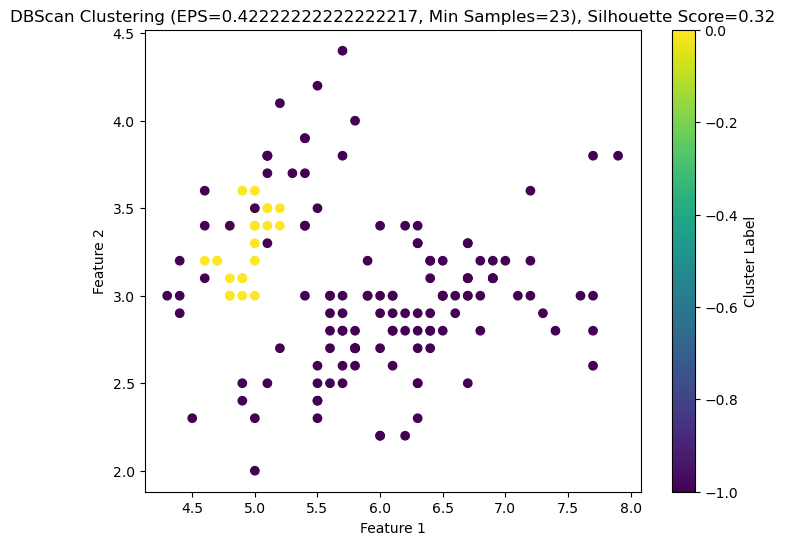

EPS: 0.42222222222222217, Min Samples: 23, Silhouette Score: 0.32


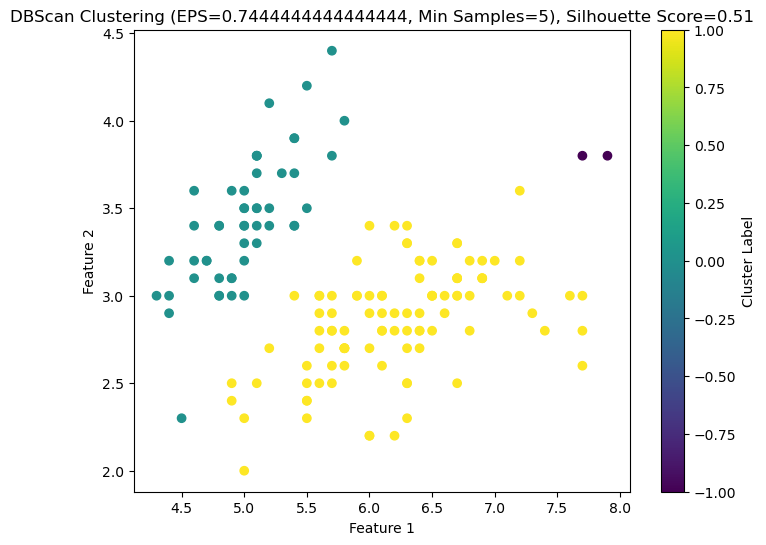

EPS: 0.7444444444444444, Min Samples: 5, Silhouette Score: 0.51


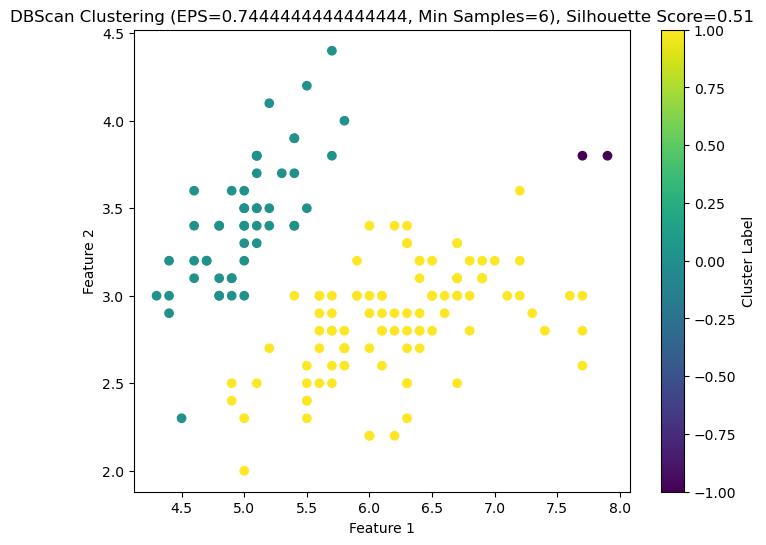

EPS: 0.7444444444444444, Min Samples: 6, Silhouette Score: 0.51


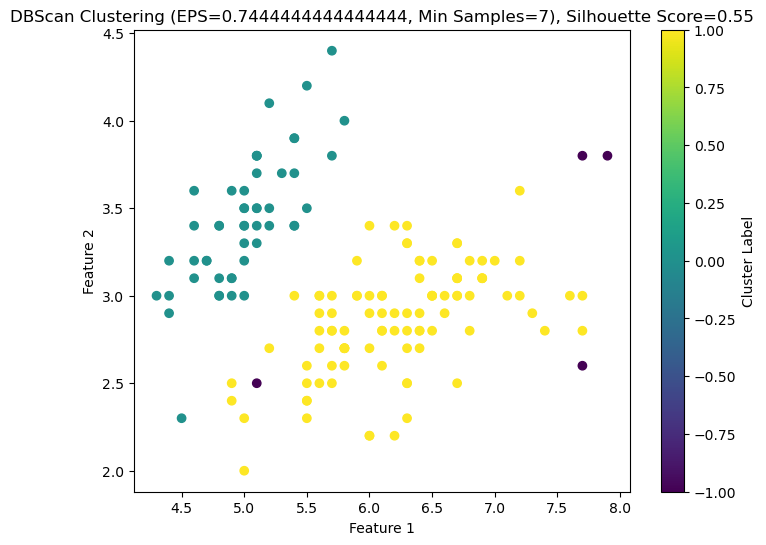

EPS: 0.7444444444444444, Min Samples: 7, Silhouette Score: 0.55


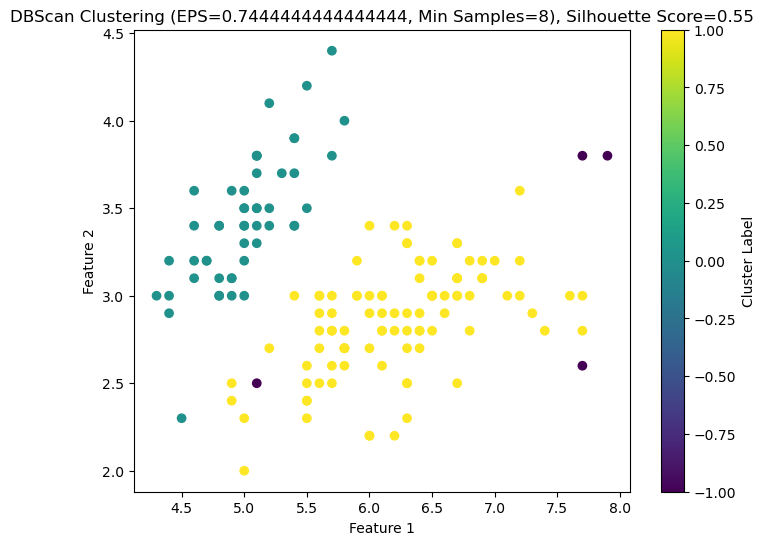

EPS: 0.7444444444444444, Min Samples: 8, Silhouette Score: 0.55


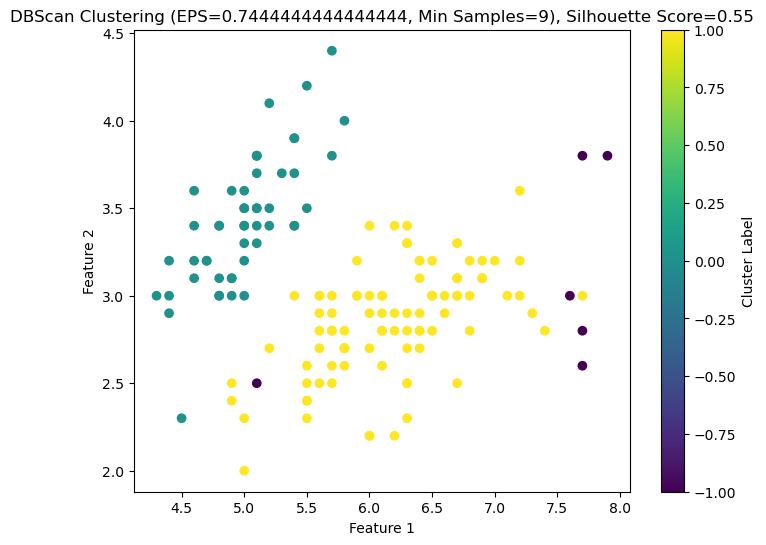

EPS: 0.7444444444444444, Min Samples: 9, Silhouette Score: 0.55


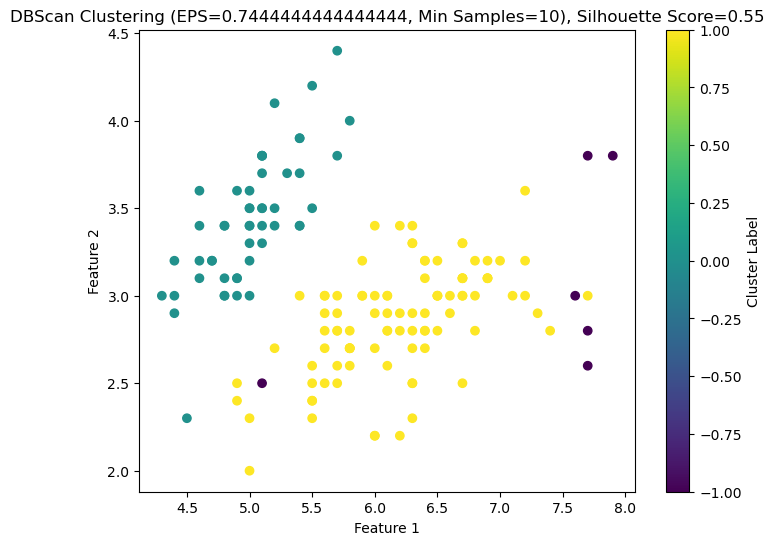

EPS: 0.7444444444444444, Min Samples: 10, Silhouette Score: 0.55


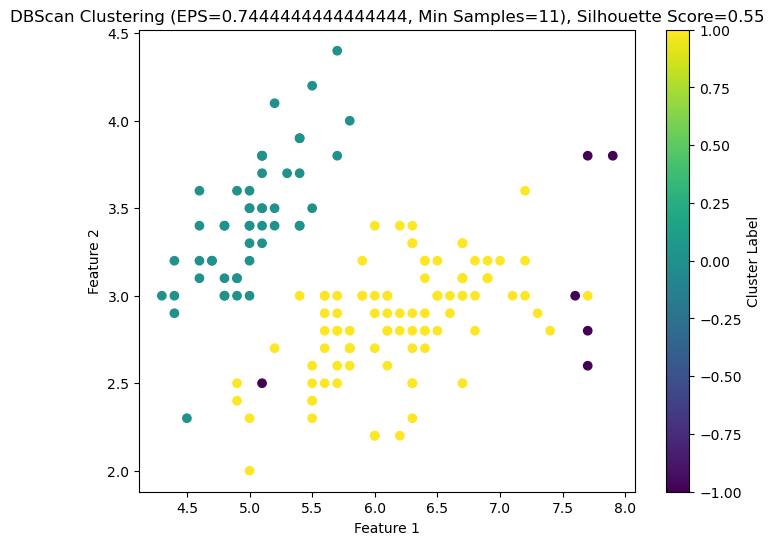

EPS: 0.7444444444444444, Min Samples: 11, Silhouette Score: 0.55


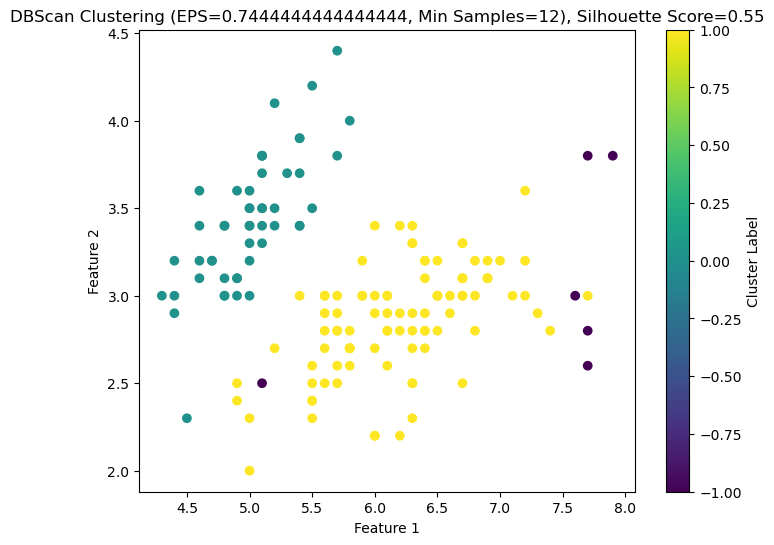

EPS: 0.7444444444444444, Min Samples: 12, Silhouette Score: 0.55


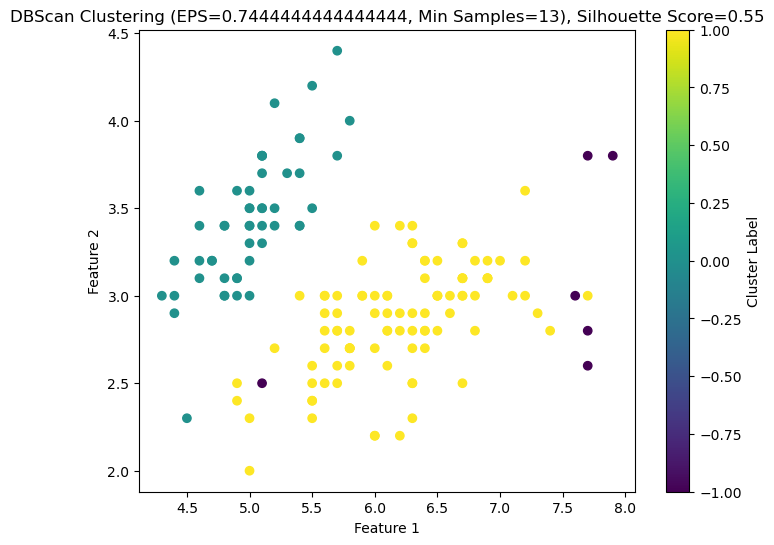

EPS: 0.7444444444444444, Min Samples: 13, Silhouette Score: 0.55


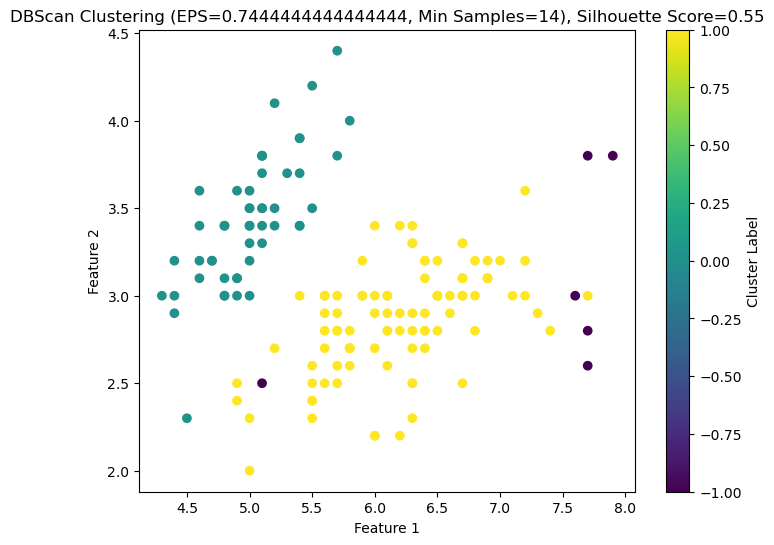

EPS: 0.7444444444444444, Min Samples: 14, Silhouette Score: 0.55


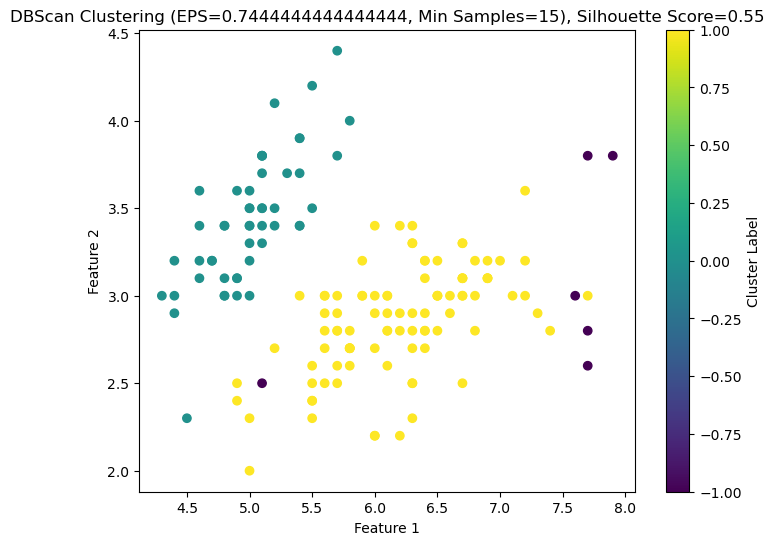

EPS: 0.7444444444444444, Min Samples: 15, Silhouette Score: 0.55


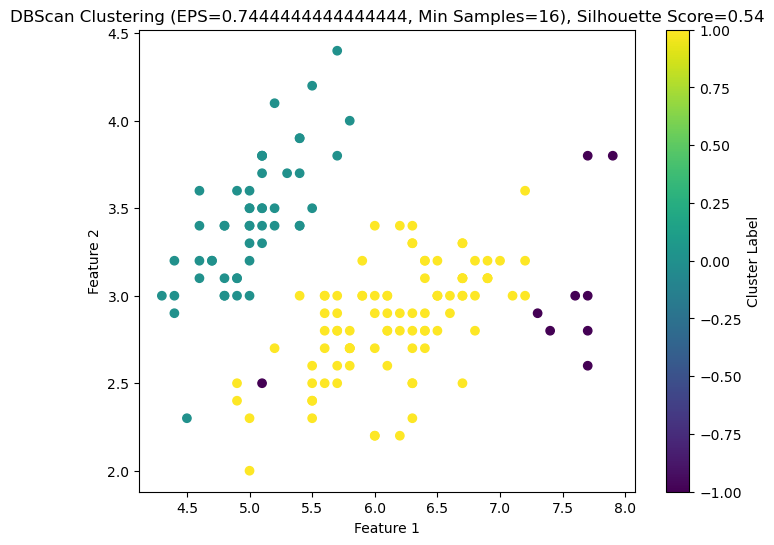

EPS: 0.7444444444444444, Min Samples: 16, Silhouette Score: 0.54


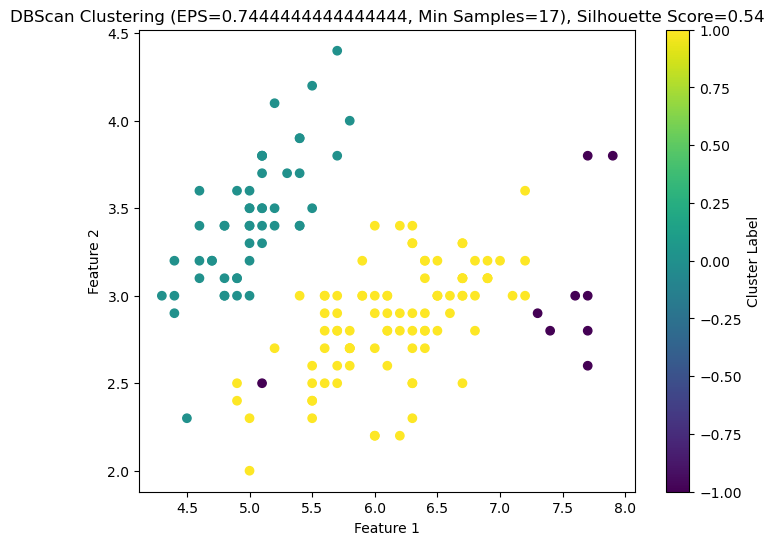

EPS: 0.7444444444444444, Min Samples: 17, Silhouette Score: 0.54


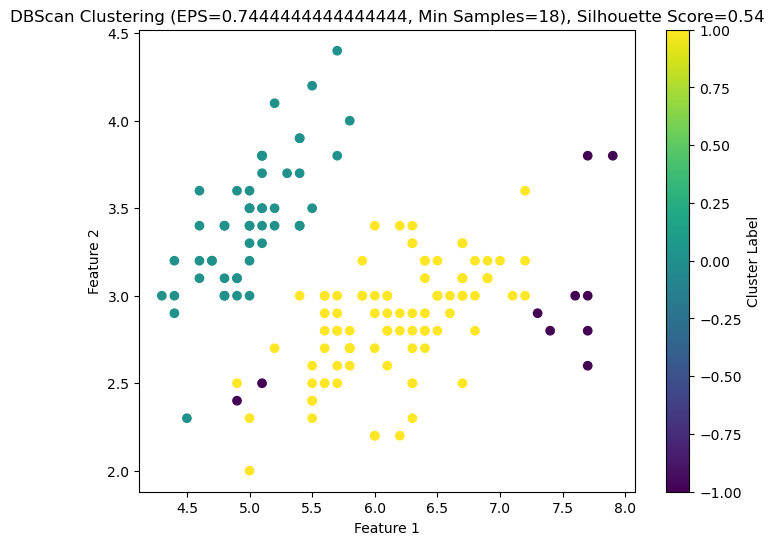

EPS: 0.7444444444444444, Min Samples: 18, Silhouette Score: 0.54


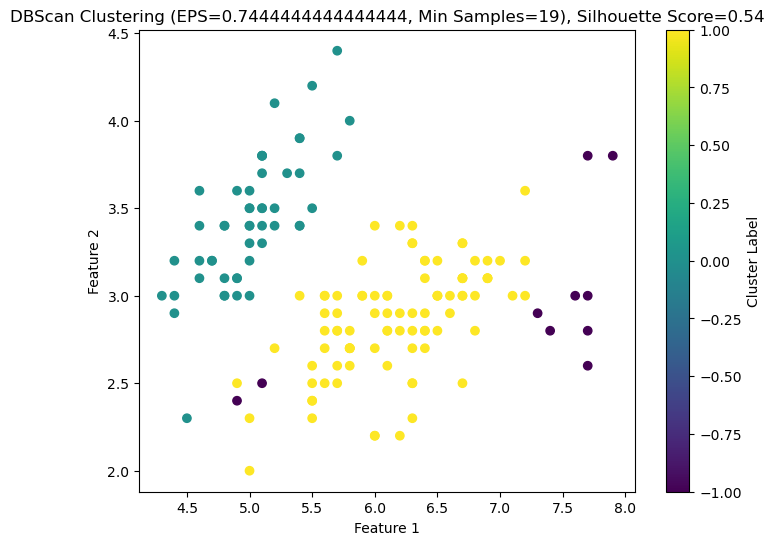

EPS: 0.7444444444444444, Min Samples: 19, Silhouette Score: 0.54


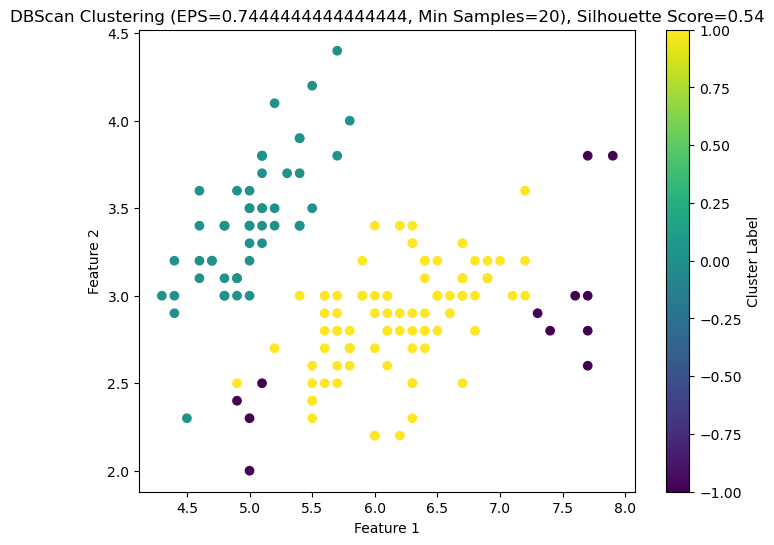

EPS: 0.7444444444444444, Min Samples: 20, Silhouette Score: 0.54


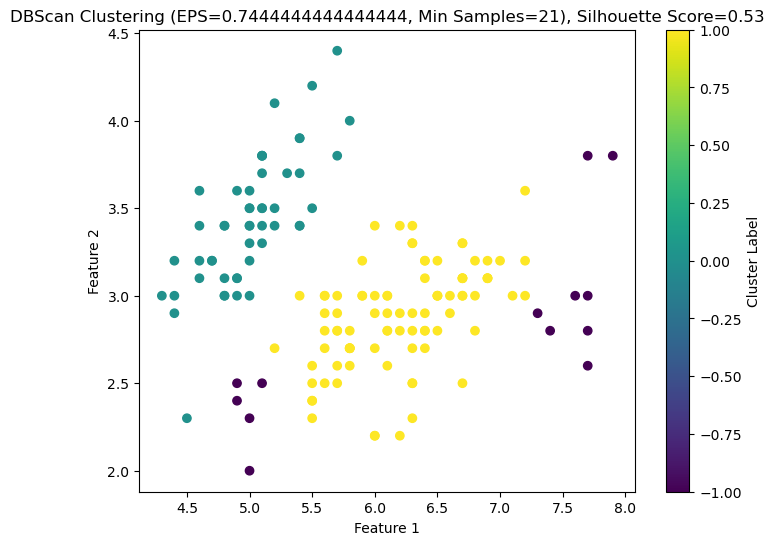

EPS: 0.7444444444444444, Min Samples: 21, Silhouette Score: 0.53


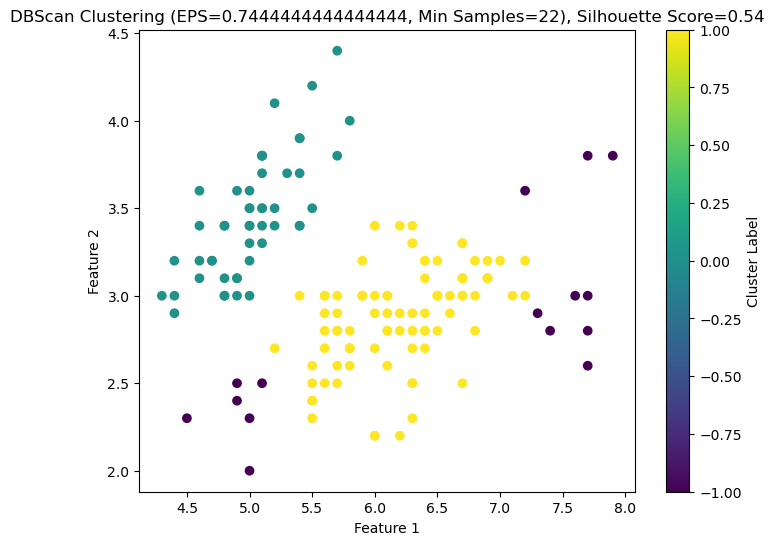

EPS: 0.7444444444444444, Min Samples: 22, Silhouette Score: 0.54


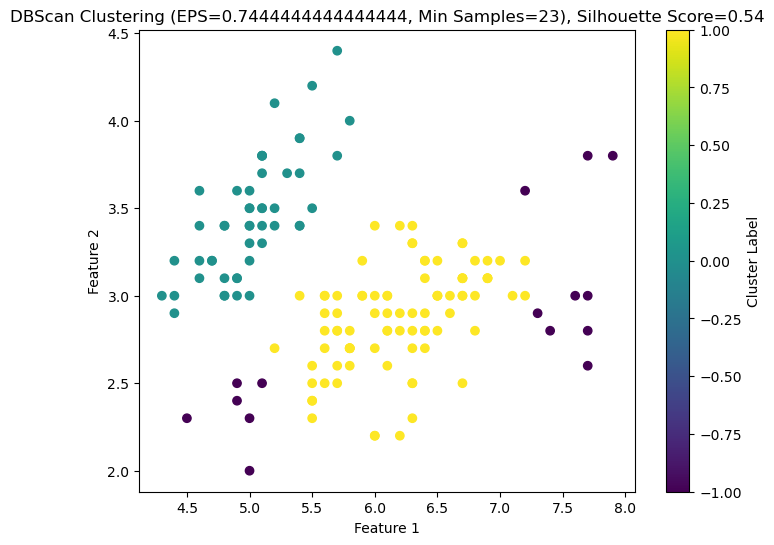

EPS: 0.7444444444444444, Min Samples: 23, Silhouette Score: 0.54


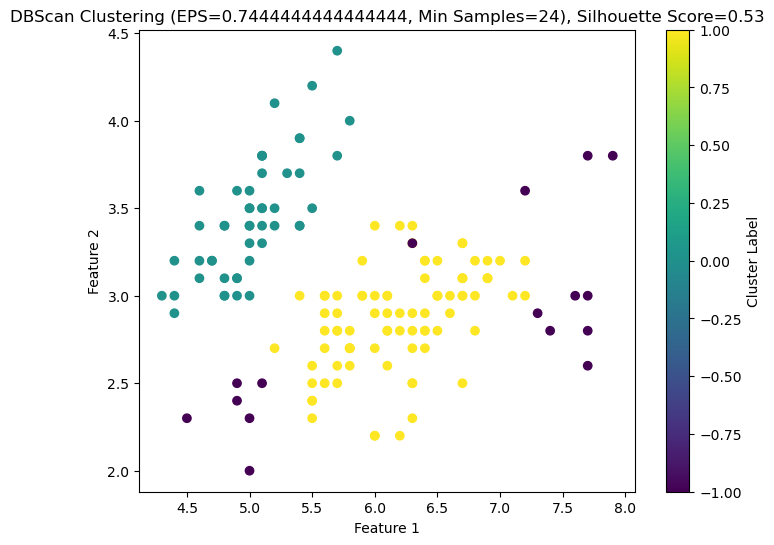

EPS: 0.7444444444444444, Min Samples: 24, Silhouette Score: 0.53


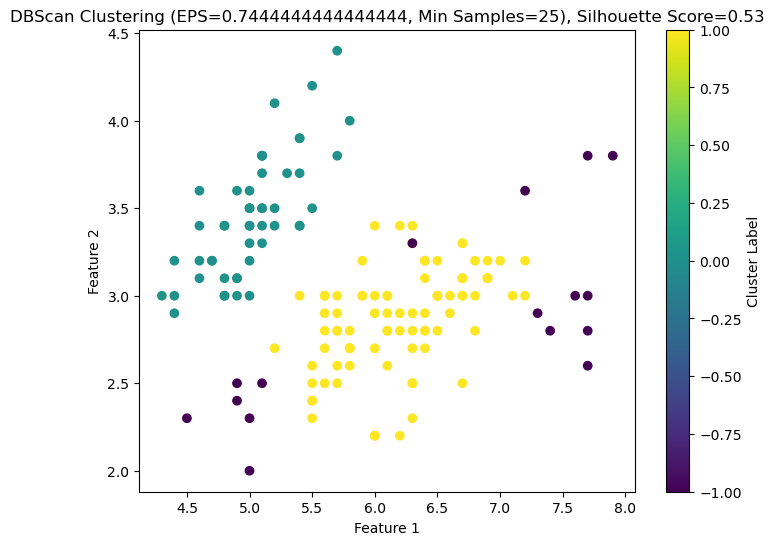

EPS: 0.7444444444444444, Min Samples: 25, Silhouette Score: 0.53


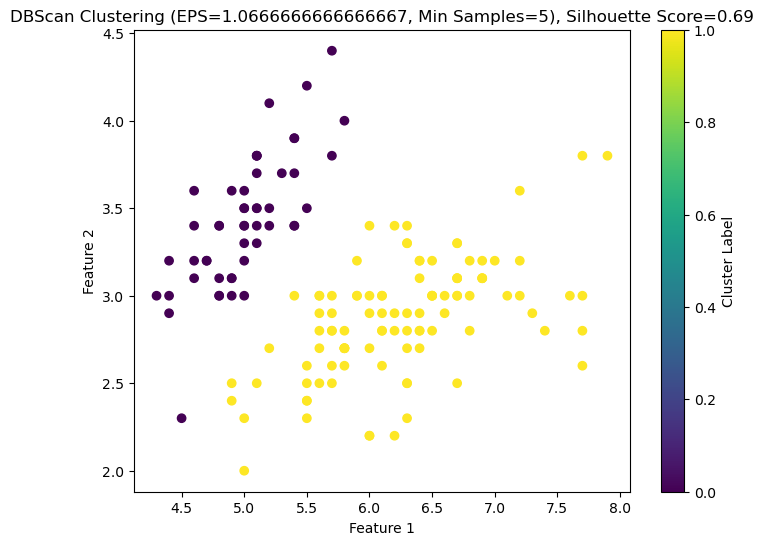

EPS: 1.0666666666666667, Min Samples: 5, Silhouette Score: 0.69


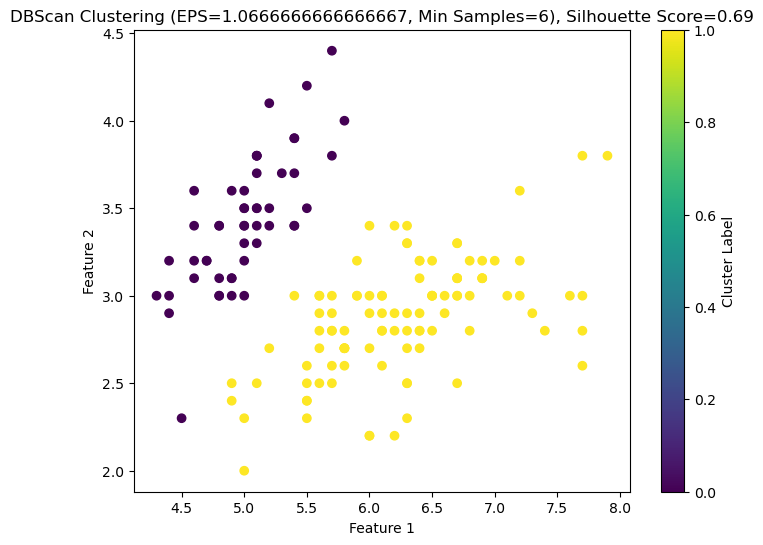

EPS: 1.0666666666666667, Min Samples: 6, Silhouette Score: 0.69


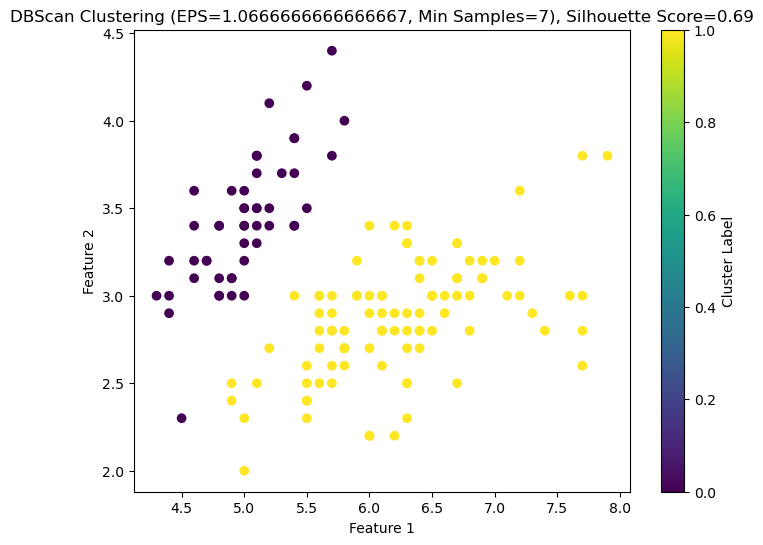

EPS: 1.0666666666666667, Min Samples: 7, Silhouette Score: 0.69


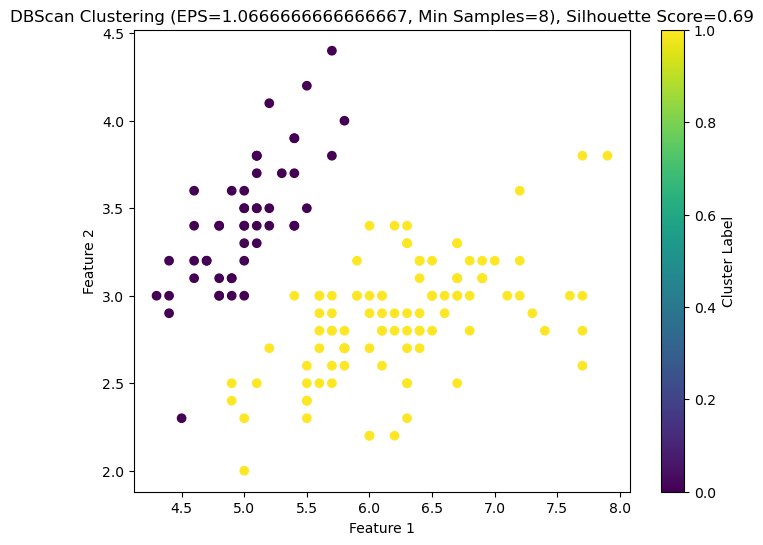

EPS: 1.0666666666666667, Min Samples: 8, Silhouette Score: 0.69


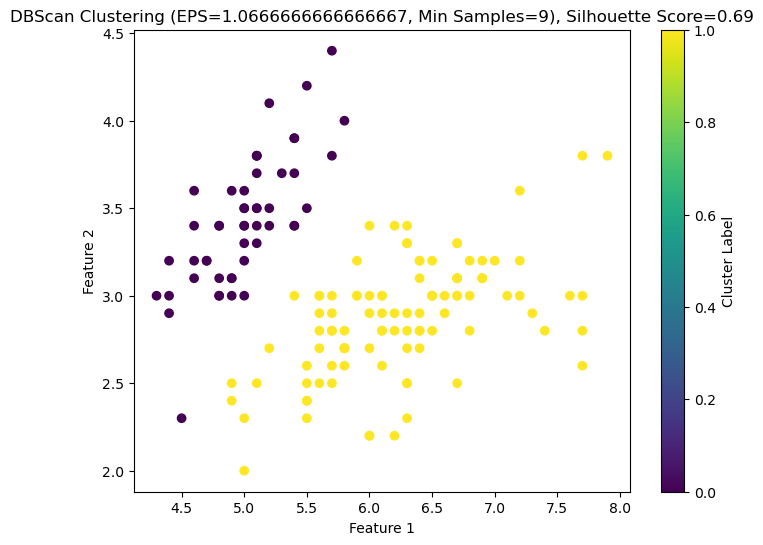

EPS: 1.0666666666666667, Min Samples: 9, Silhouette Score: 0.69


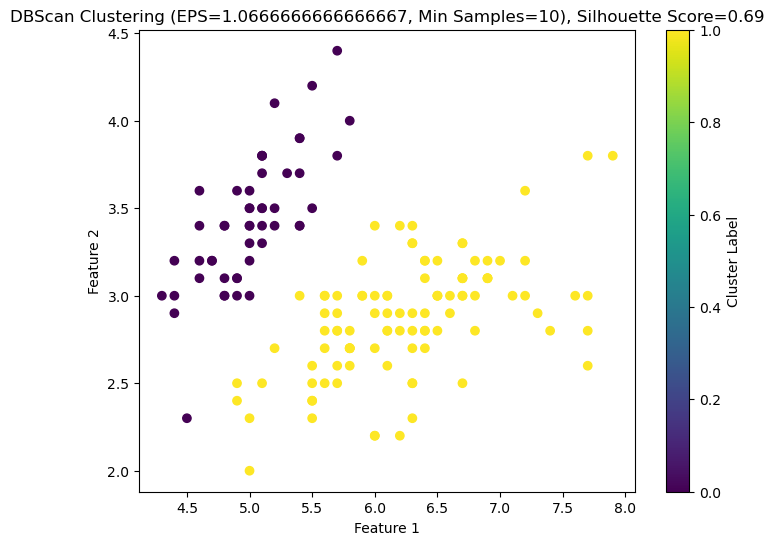

EPS: 1.0666666666666667, Min Samples: 10, Silhouette Score: 0.69


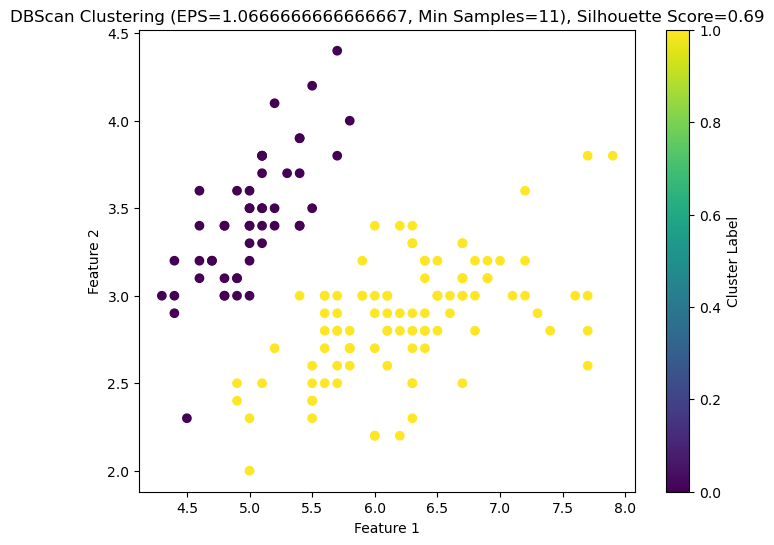

EPS: 1.0666666666666667, Min Samples: 11, Silhouette Score: 0.69


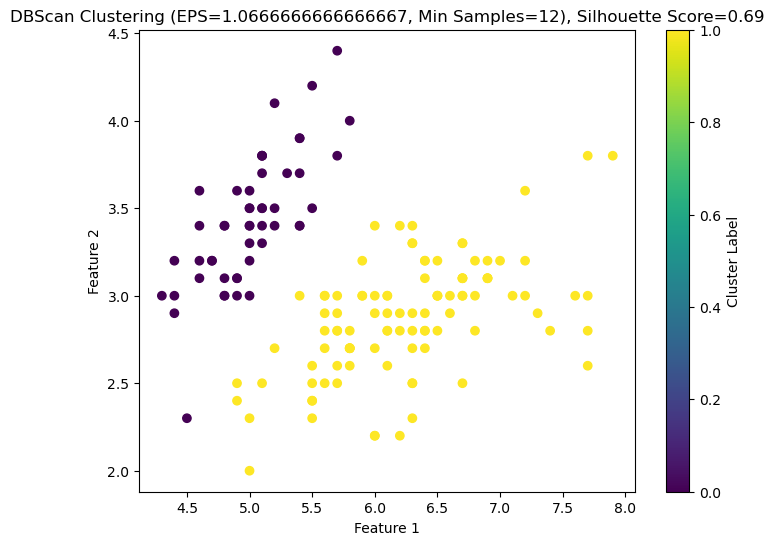

EPS: 1.0666666666666667, Min Samples: 12, Silhouette Score: 0.69


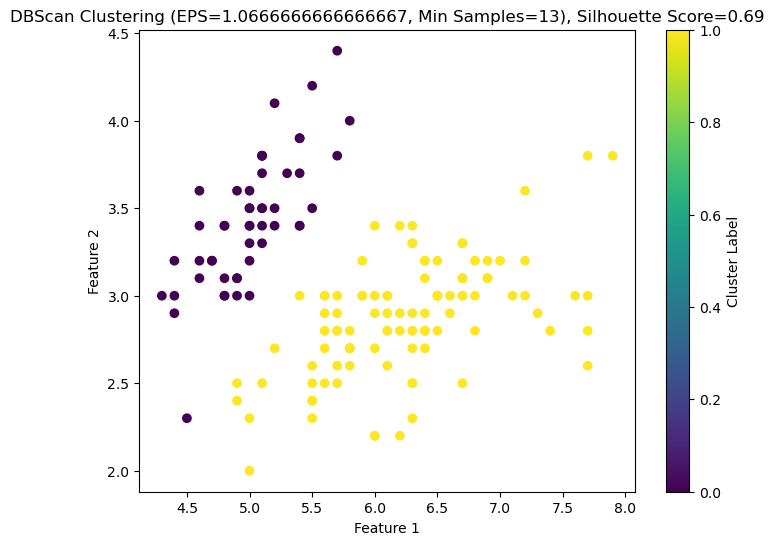

EPS: 1.0666666666666667, Min Samples: 13, Silhouette Score: 0.69


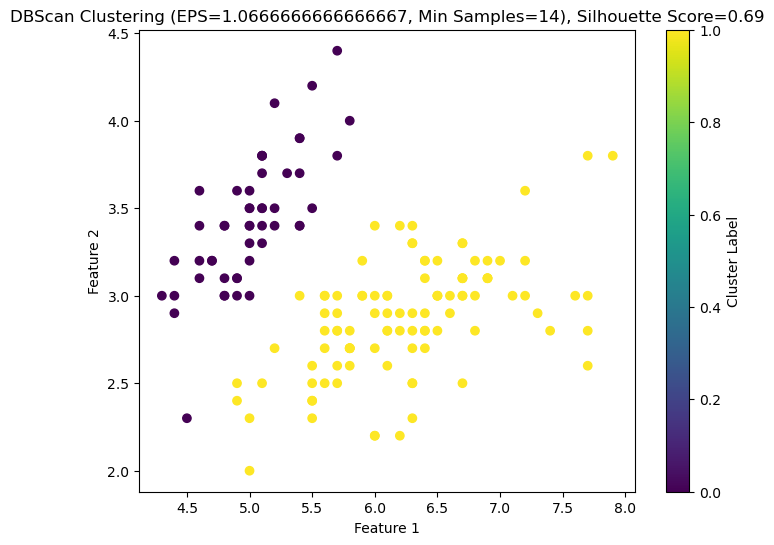

EPS: 1.0666666666666667, Min Samples: 14, Silhouette Score: 0.69


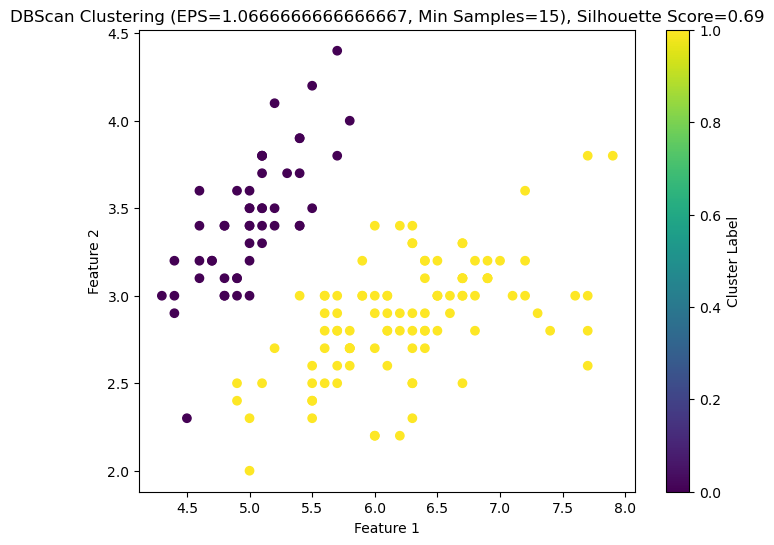

EPS: 1.0666666666666667, Min Samples: 15, Silhouette Score: 0.69


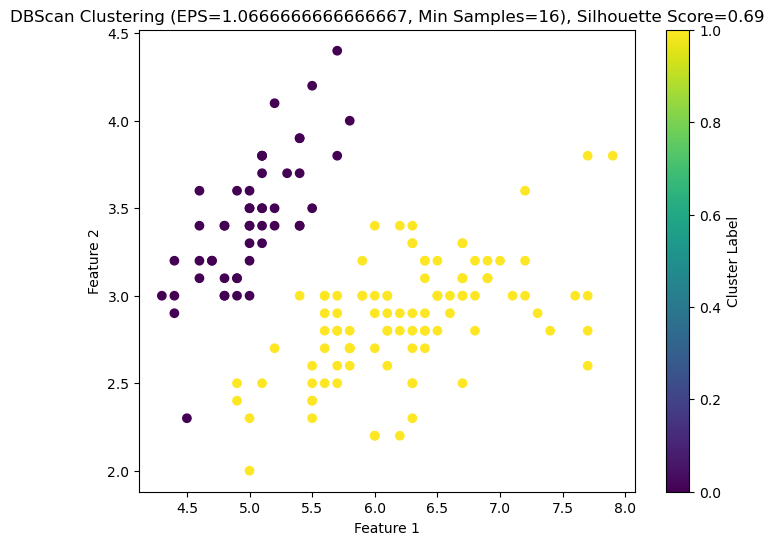

EPS: 1.0666666666666667, Min Samples: 16, Silhouette Score: 0.69


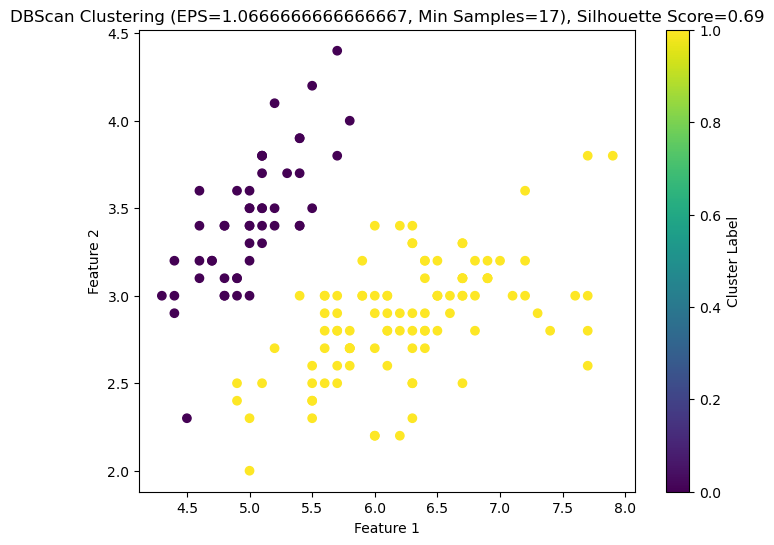

EPS: 1.0666666666666667, Min Samples: 17, Silhouette Score: 0.69


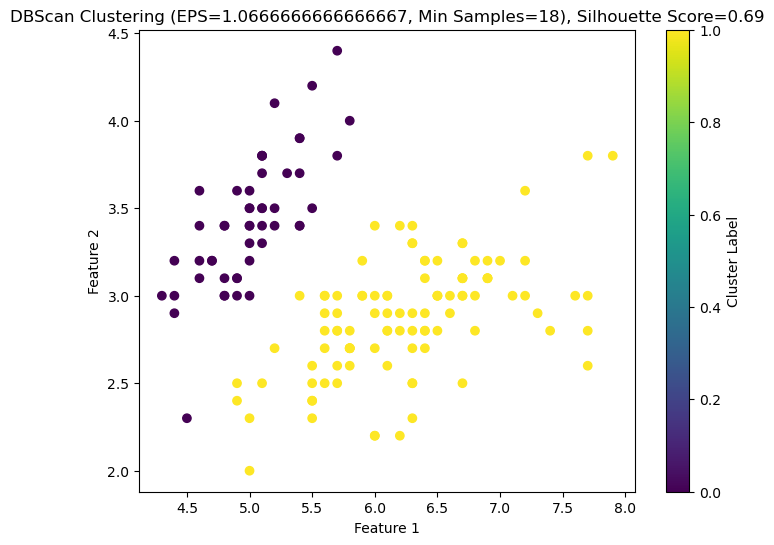

EPS: 1.0666666666666667, Min Samples: 18, Silhouette Score: 0.69


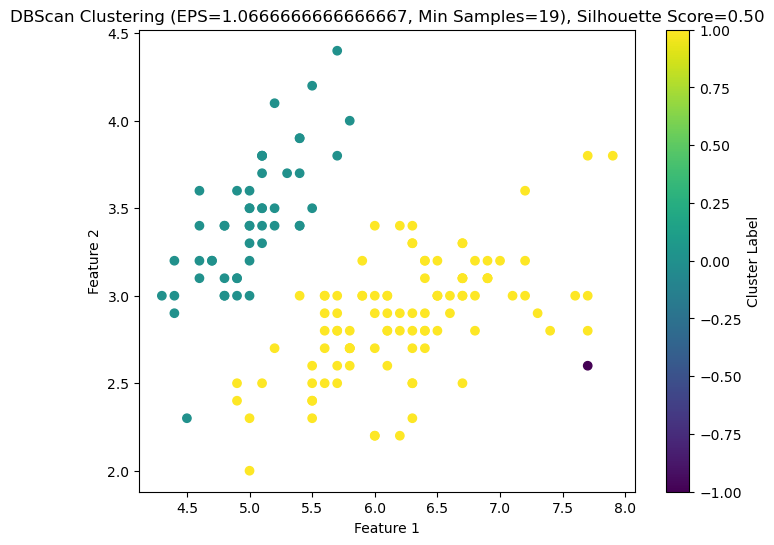

EPS: 1.0666666666666667, Min Samples: 19, Silhouette Score: 0.50


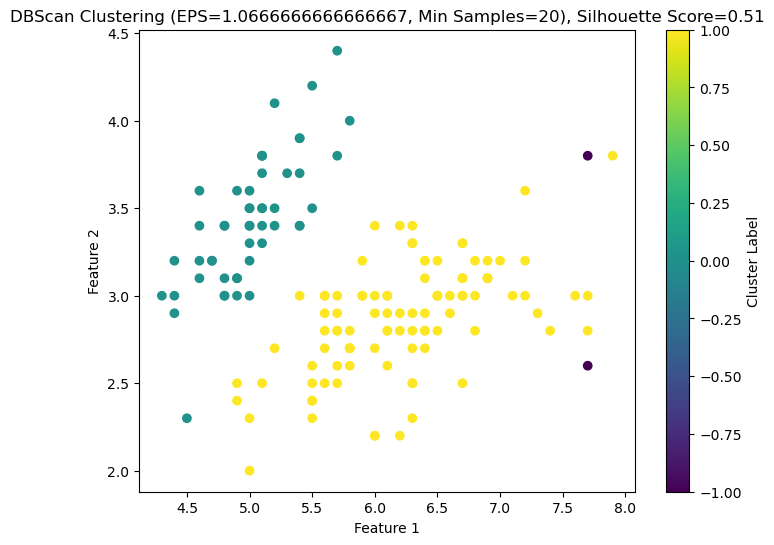

EPS: 1.0666666666666667, Min Samples: 20, Silhouette Score: 0.51


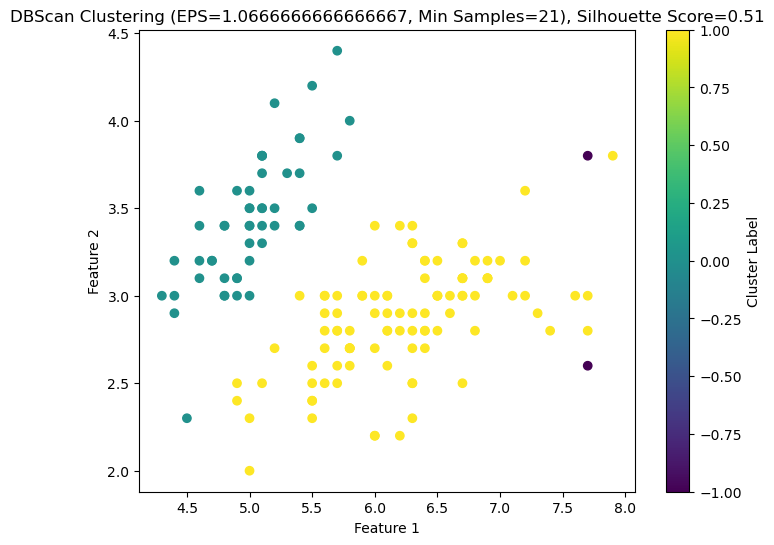

EPS: 1.0666666666666667, Min Samples: 21, Silhouette Score: 0.51


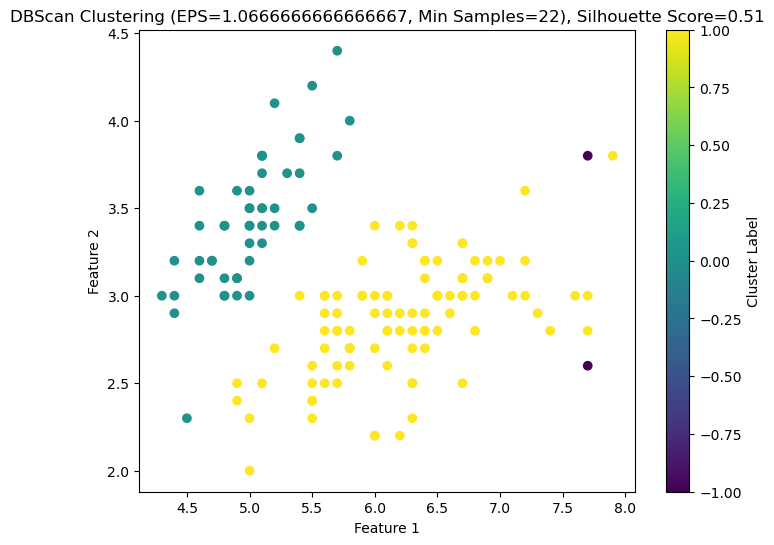

EPS: 1.0666666666666667, Min Samples: 22, Silhouette Score: 0.51


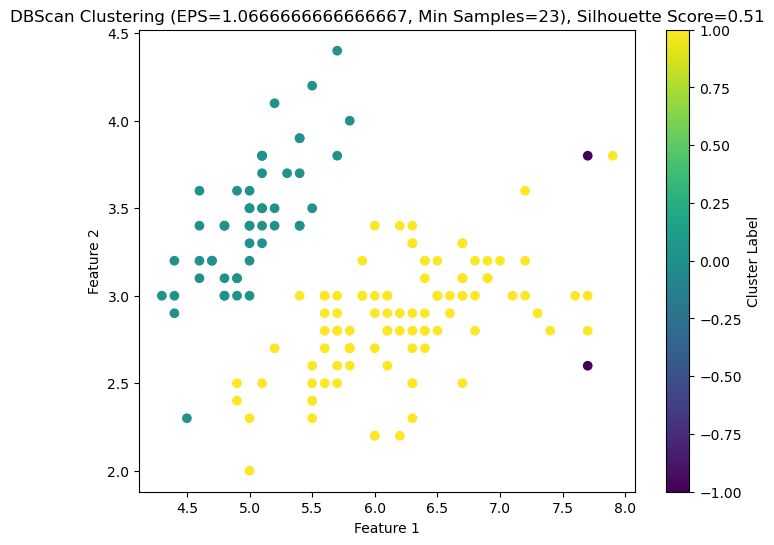

EPS: 1.0666666666666667, Min Samples: 23, Silhouette Score: 0.51


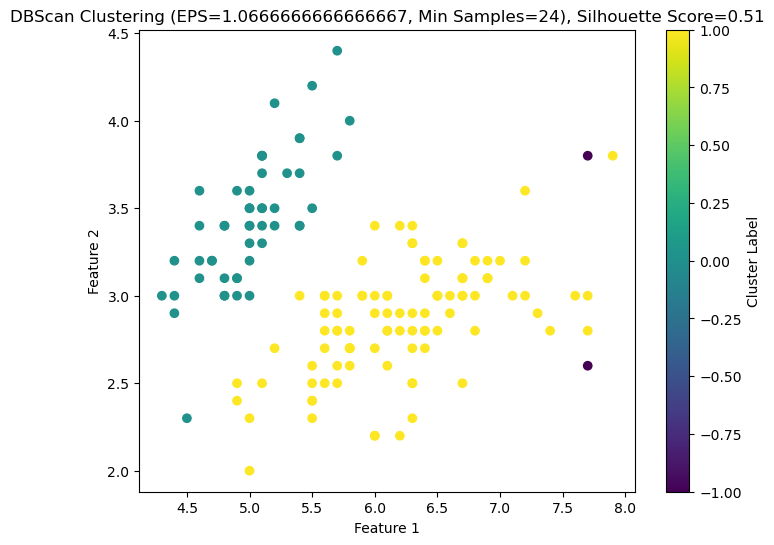

EPS: 1.0666666666666667, Min Samples: 24, Silhouette Score: 0.51


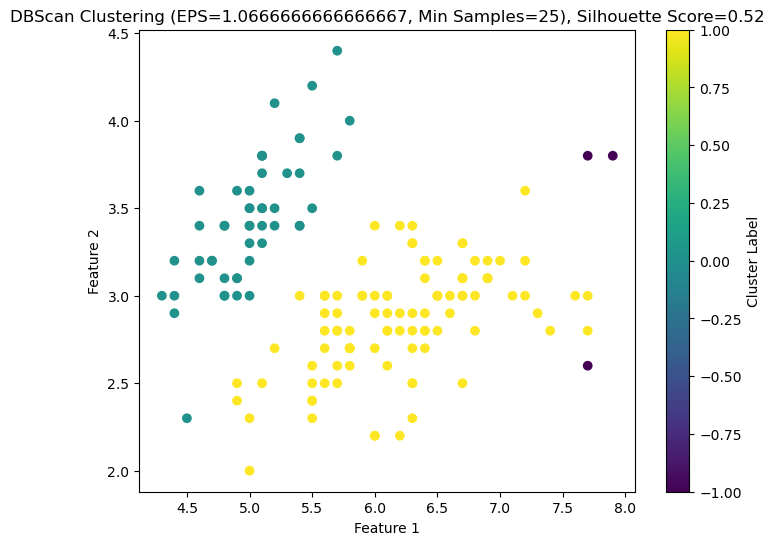

EPS: 1.0666666666666667, Min Samples: 25, Silhouette Score: 0.52


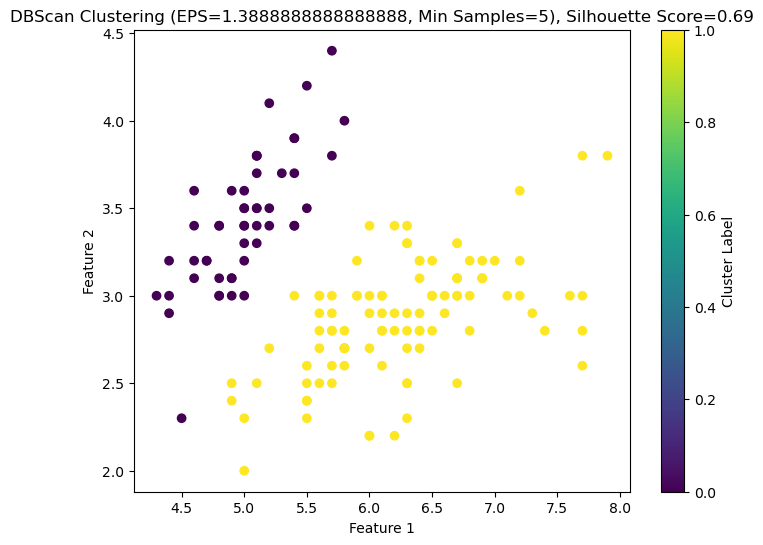

EPS: 1.3888888888888888, Min Samples: 5, Silhouette Score: 0.69


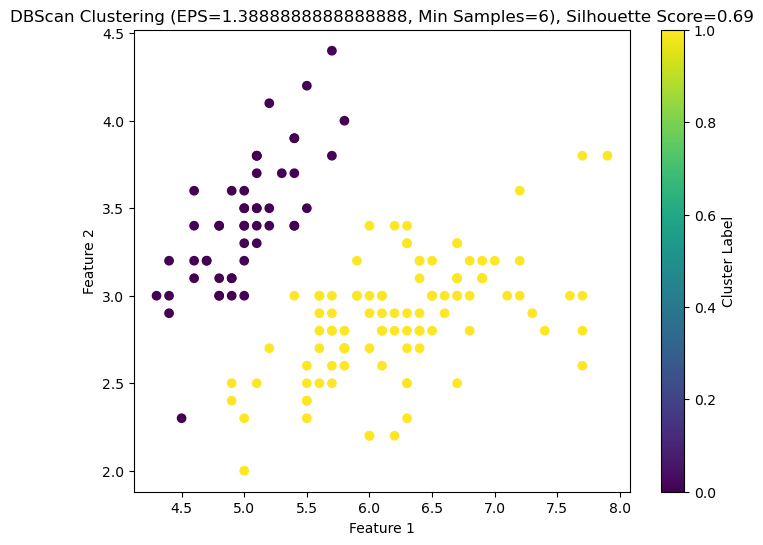

EPS: 1.3888888888888888, Min Samples: 6, Silhouette Score: 0.69


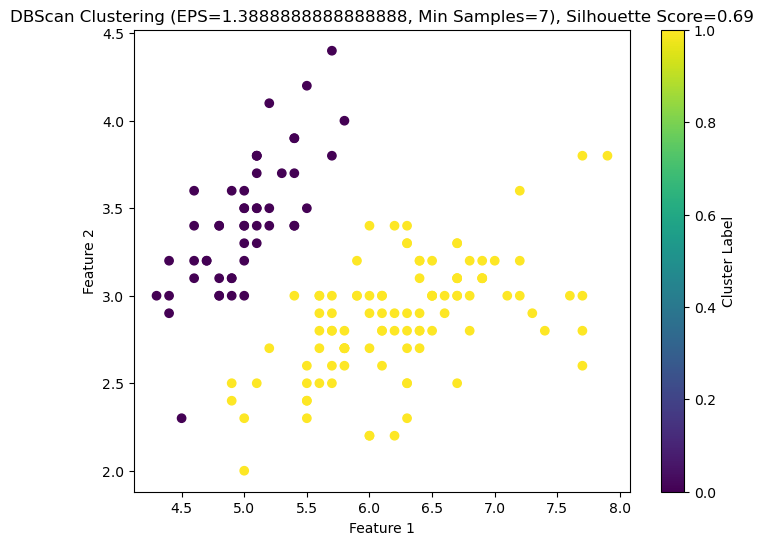

EPS: 1.3888888888888888, Min Samples: 7, Silhouette Score: 0.69


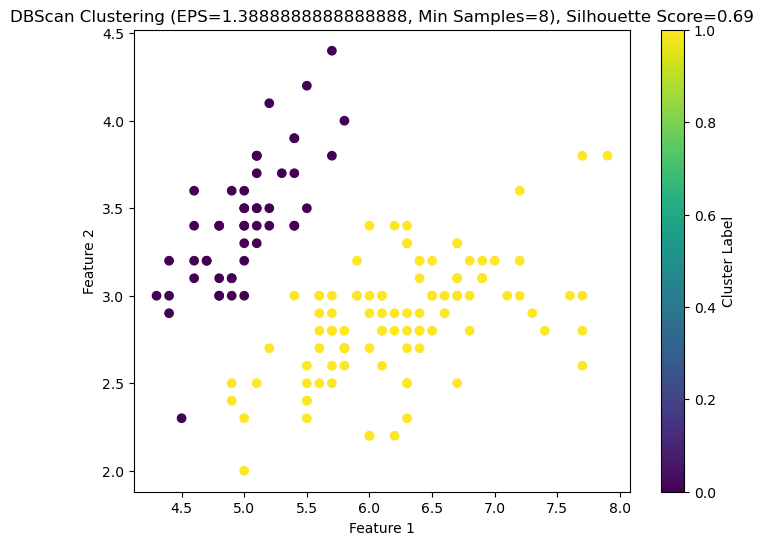

EPS: 1.3888888888888888, Min Samples: 8, Silhouette Score: 0.69


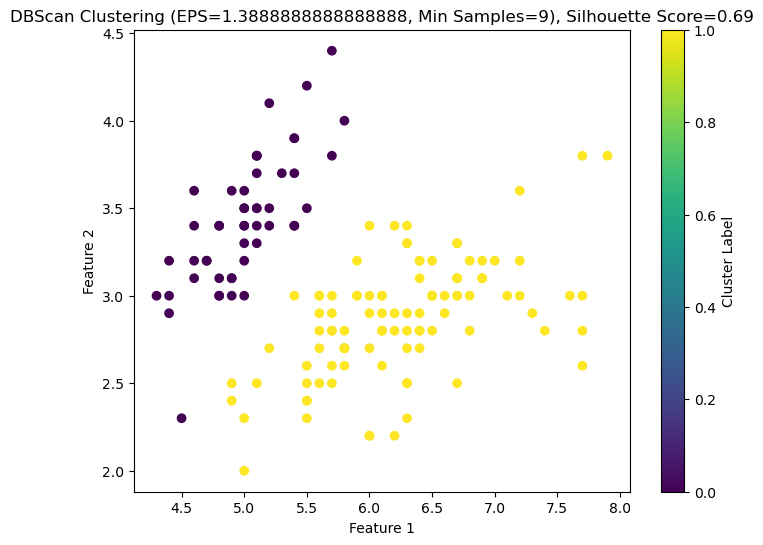

EPS: 1.3888888888888888, Min Samples: 9, Silhouette Score: 0.69


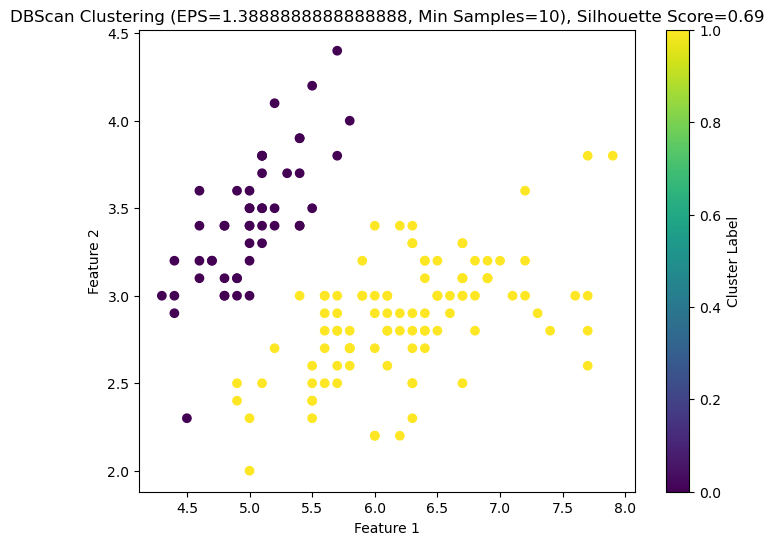

EPS: 1.3888888888888888, Min Samples: 10, Silhouette Score: 0.69


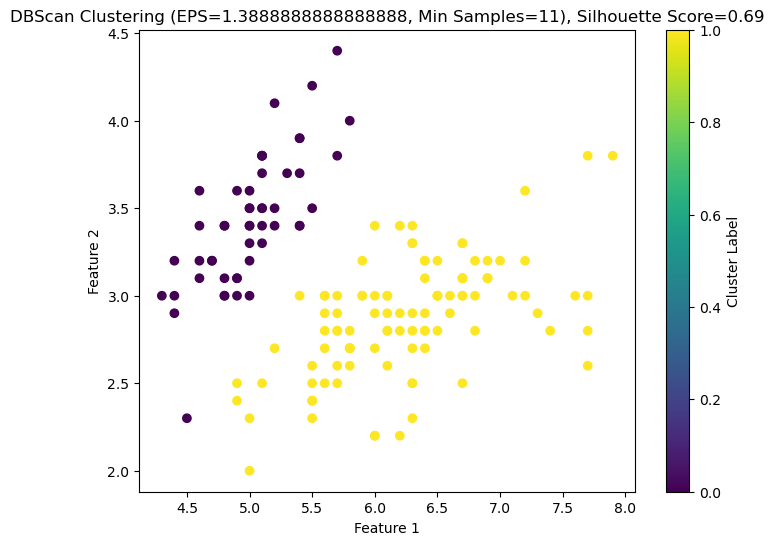

EPS: 1.3888888888888888, Min Samples: 11, Silhouette Score: 0.69


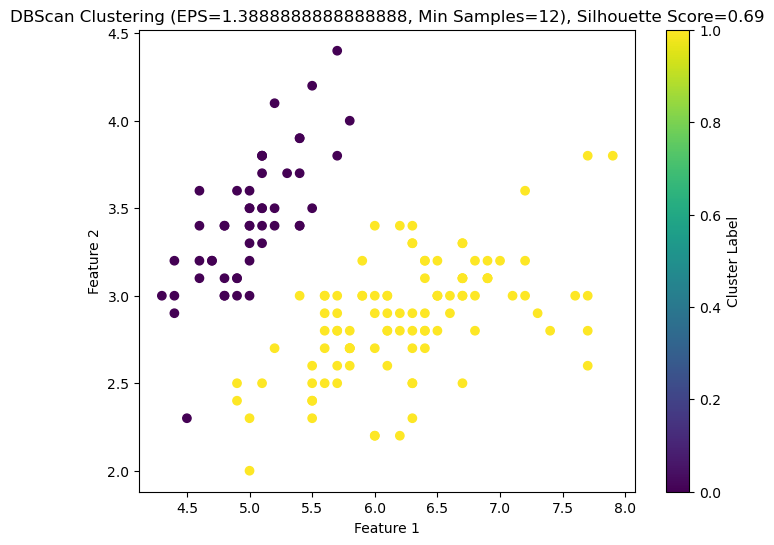

EPS: 1.3888888888888888, Min Samples: 12, Silhouette Score: 0.69


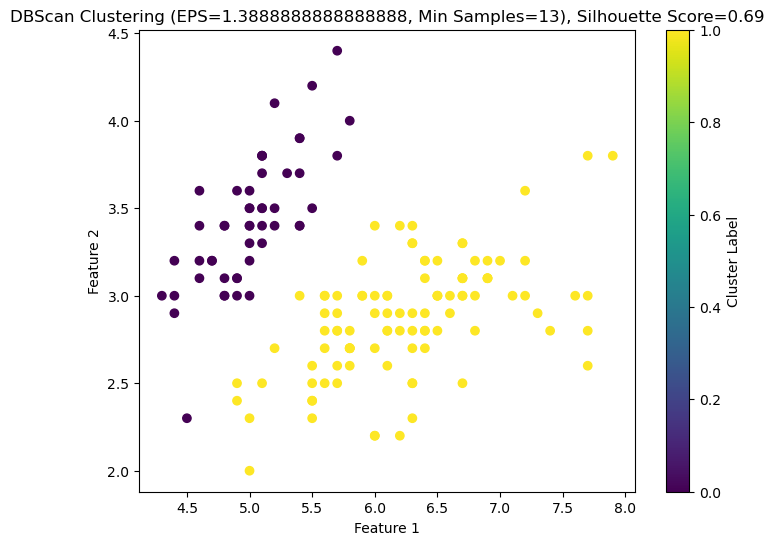

EPS: 1.3888888888888888, Min Samples: 13, Silhouette Score: 0.69


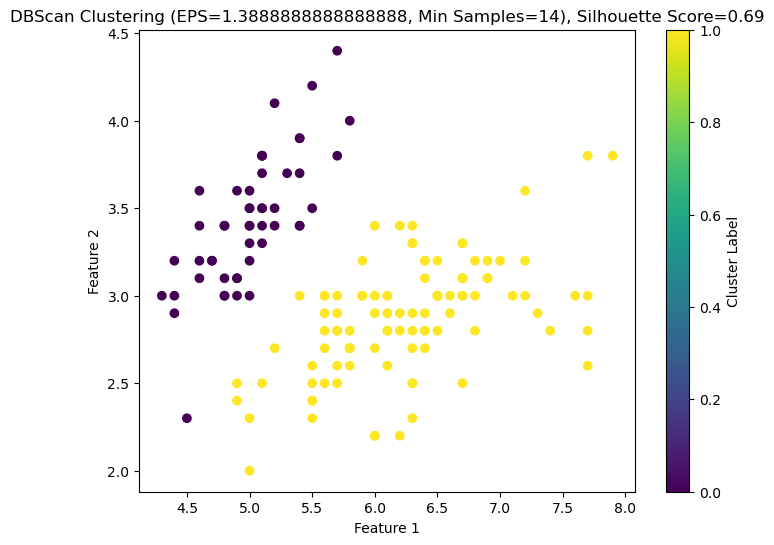

EPS: 1.3888888888888888, Min Samples: 14, Silhouette Score: 0.69


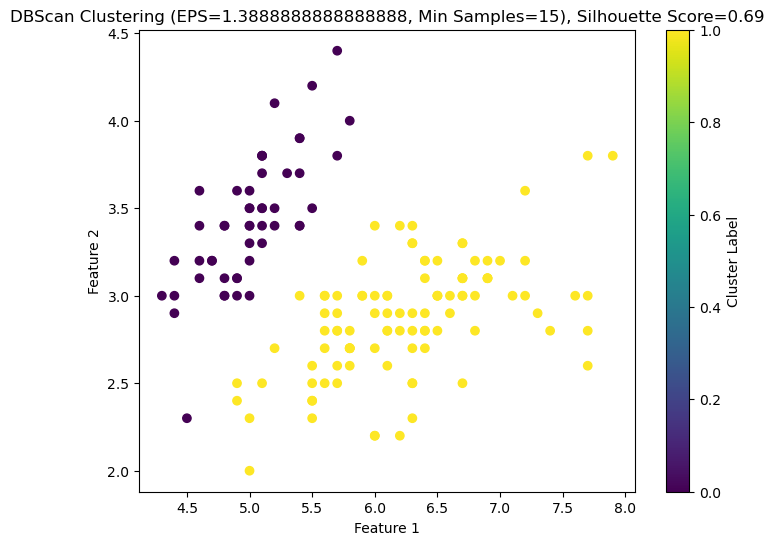

EPS: 1.3888888888888888, Min Samples: 15, Silhouette Score: 0.69


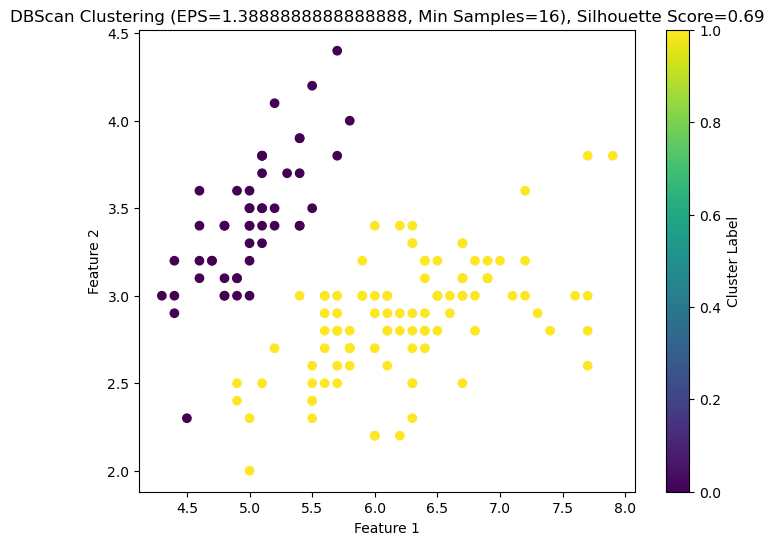

EPS: 1.3888888888888888, Min Samples: 16, Silhouette Score: 0.69


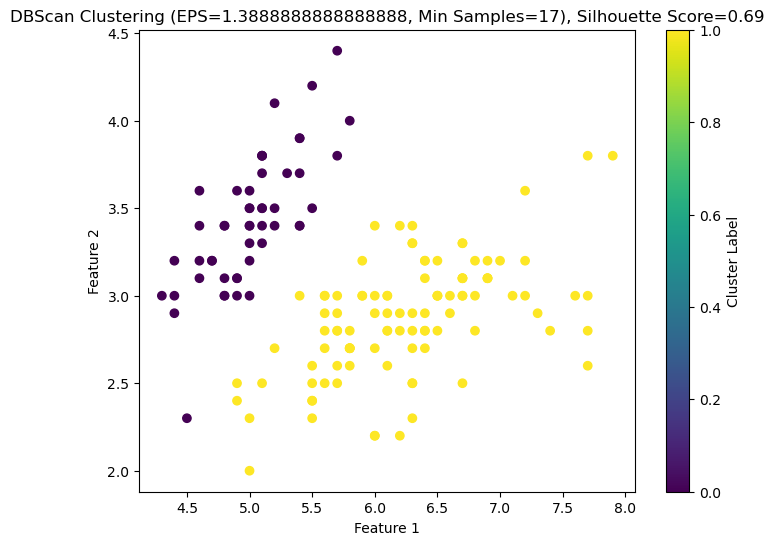

EPS: 1.3888888888888888, Min Samples: 17, Silhouette Score: 0.69


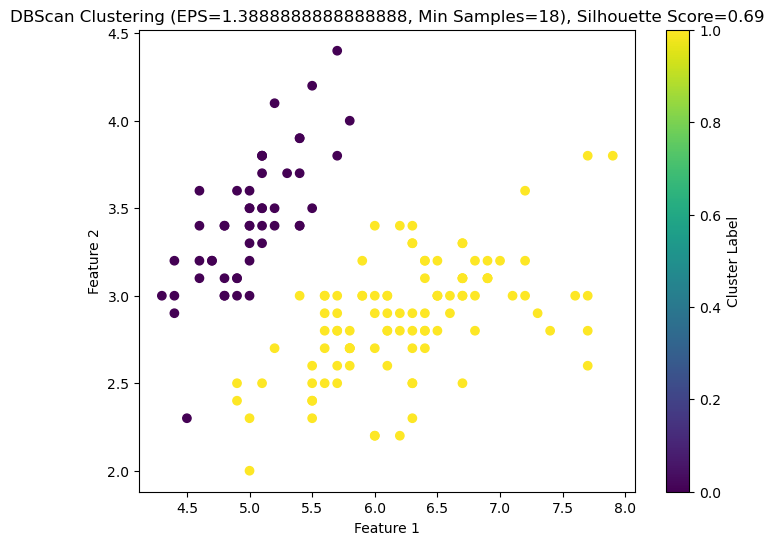

EPS: 1.3888888888888888, Min Samples: 18, Silhouette Score: 0.69


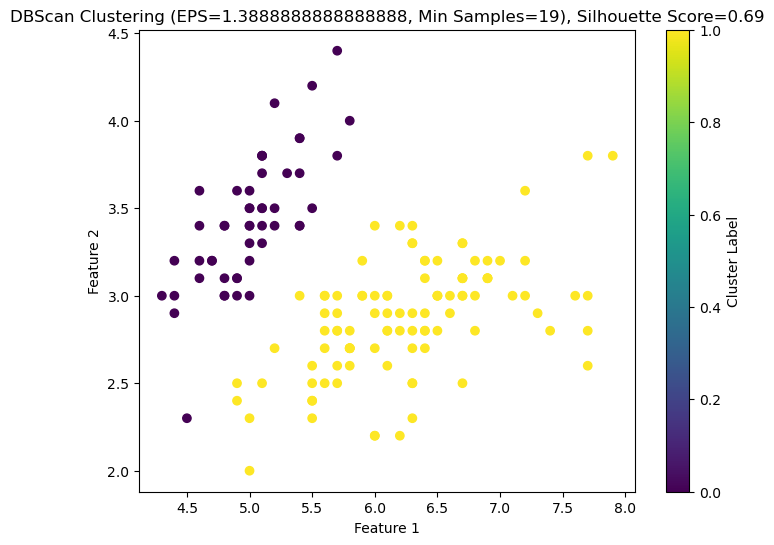

EPS: 1.3888888888888888, Min Samples: 19, Silhouette Score: 0.69


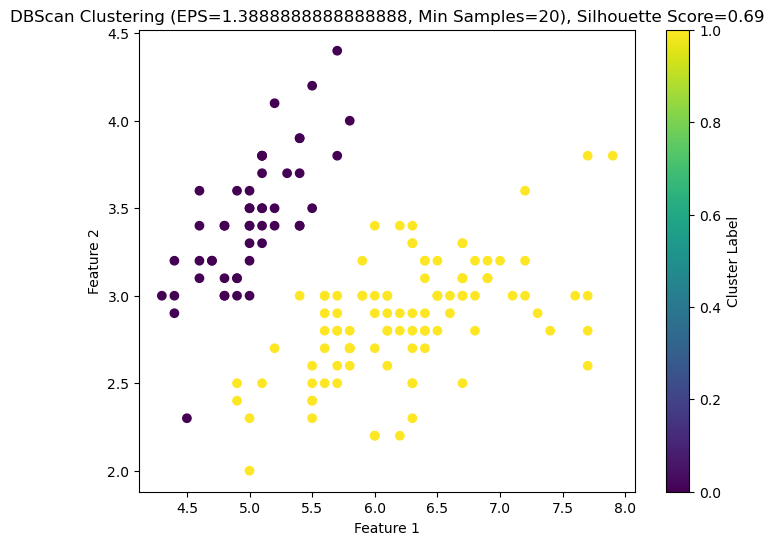

EPS: 1.3888888888888888, Min Samples: 20, Silhouette Score: 0.69


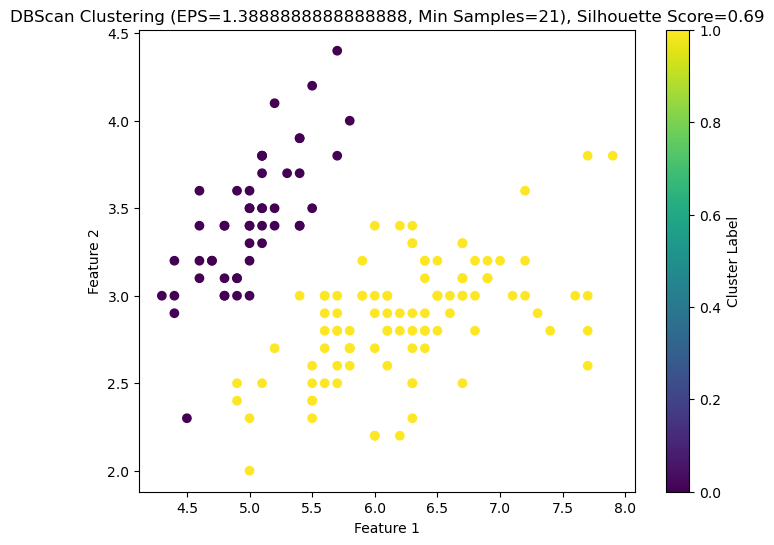

EPS: 1.3888888888888888, Min Samples: 21, Silhouette Score: 0.69


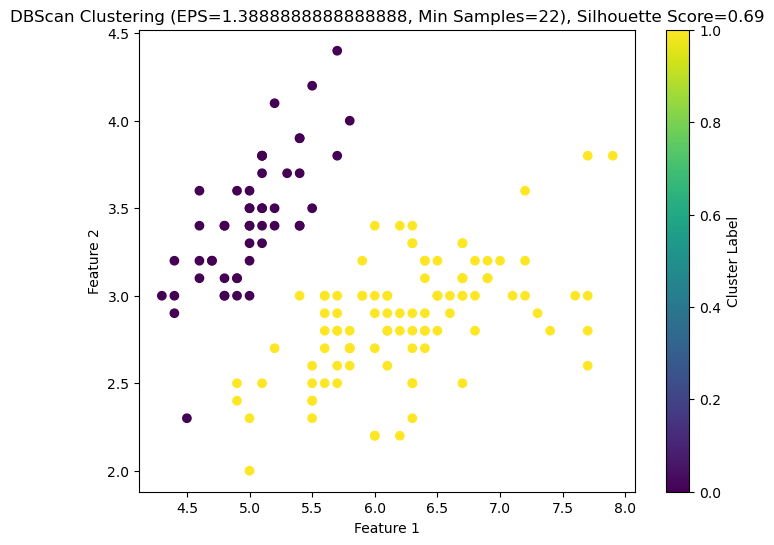

EPS: 1.3888888888888888, Min Samples: 22, Silhouette Score: 0.69


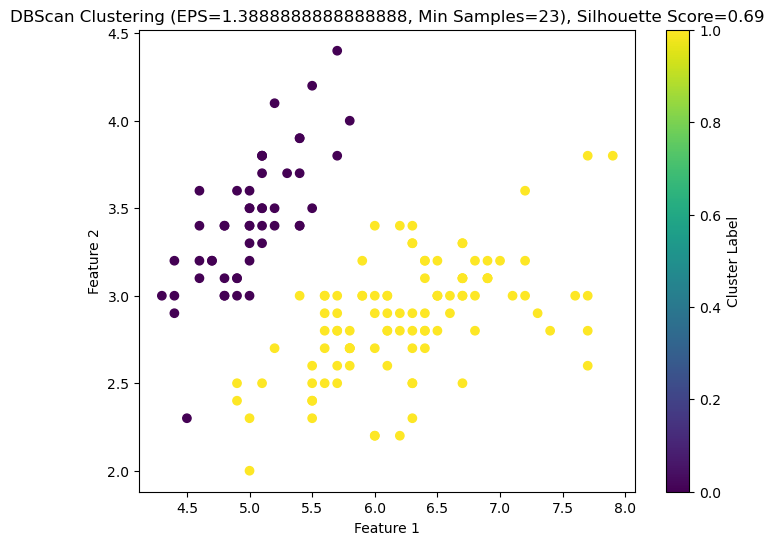

EPS: 1.3888888888888888, Min Samples: 23, Silhouette Score: 0.69


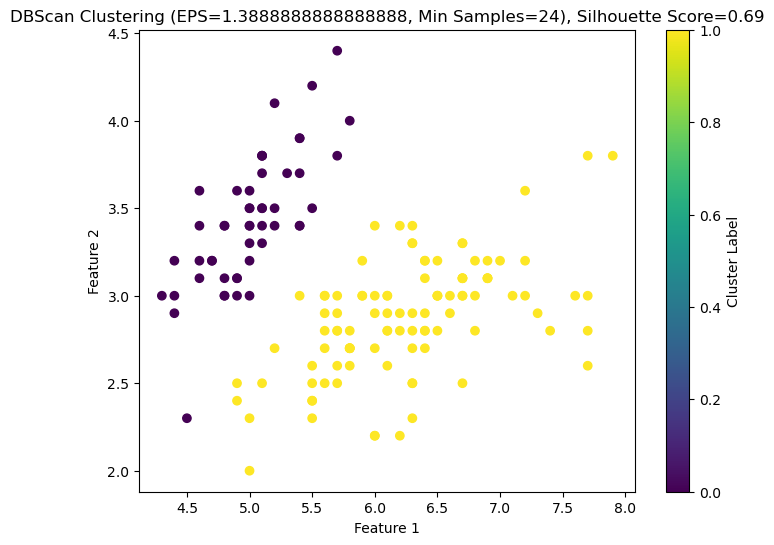

EPS: 1.3888888888888888, Min Samples: 24, Silhouette Score: 0.69


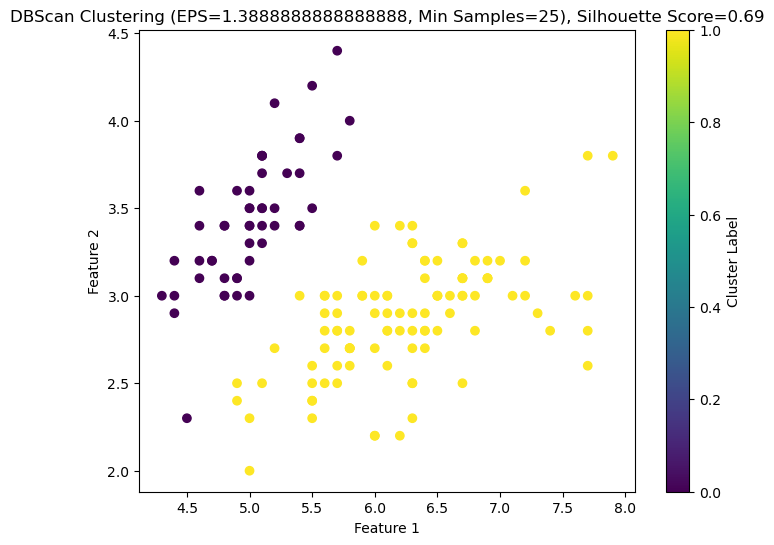

EPS: 1.3888888888888888, Min Samples: 25, Silhouette Score: 0.69
Best parameters: EPS=1.0666666666666667, Min Samples=5, Silhouette Score=0.69
Best Parameters: {'eps': 1.0666666666666667, 'min_samples': 5}
Best Silhouette Score: 0.6867350732769777


In [62]:
def perform_dbscan_clustering(data, eps_values, min_samples_values):
    best_silhouette_score = -1
    best_params = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            
            # Check if there are at least two unique labels
            unique_labels = np.unique(labels)
            if len(unique_labels) < 2:
                continue
            
            silhouette_score_value = silhouette_score(data, labels)

            # Visualize resulting clusters
            plt.figure(figsize=(8, 6))
            plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
            plt.title(f'DBScan Clustering (EPS={eps}, Min Samples={min_samples}), Silhouette Score={silhouette_score_value:.2f}')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.colorbar(label='Cluster Label')
            plt.show()

            print(f"EPS: {eps}, Min Samples: {min_samples}, Silhouette Score: {silhouette_score_value:.2f}")

            # Store best silhouette score and parameters
            if silhouette_score_value > best_silhouette_score:
                best_silhouette_score = silhouette_score_value
                best_params = {'eps': eps, 'min_samples': min_samples}

    print(f'Best parameters: EPS={best_params["eps"]}, Min Samples={best_params["min_samples"]}, Silhouette Score={best_silhouette_score:.2f}')
    return best_params, best_silhouette_score


# Define EPS and Min Samples values to try
eps_values = np.linspace(0.1, 3, 10)
min_samples_values = range(5, 26)

# Perform DBScan clustering
best_params, best_silhouette_score = perform_dbscan_clustering(X, eps_values, min_samples_values)

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_silhouette_score)



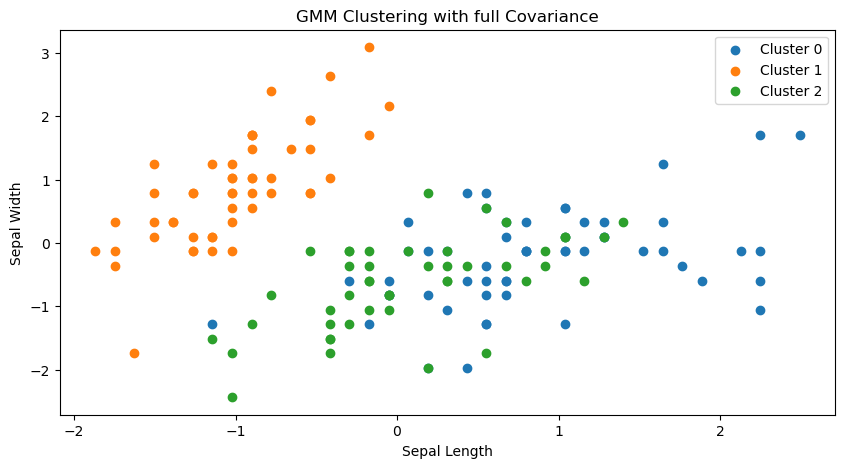

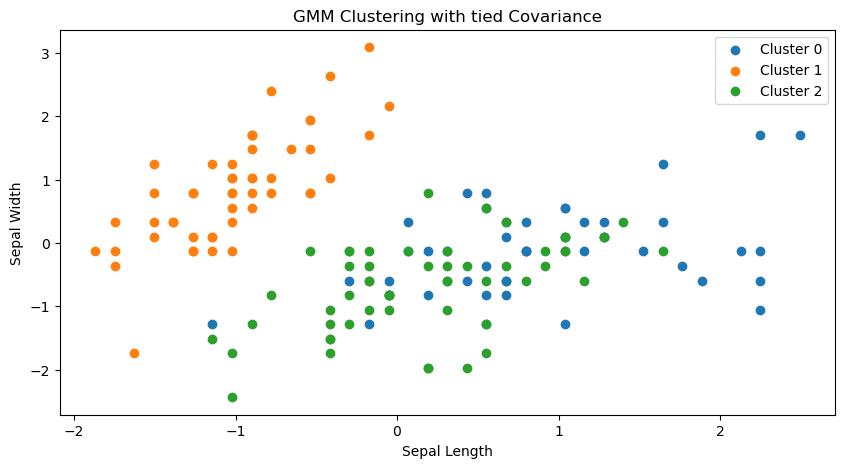

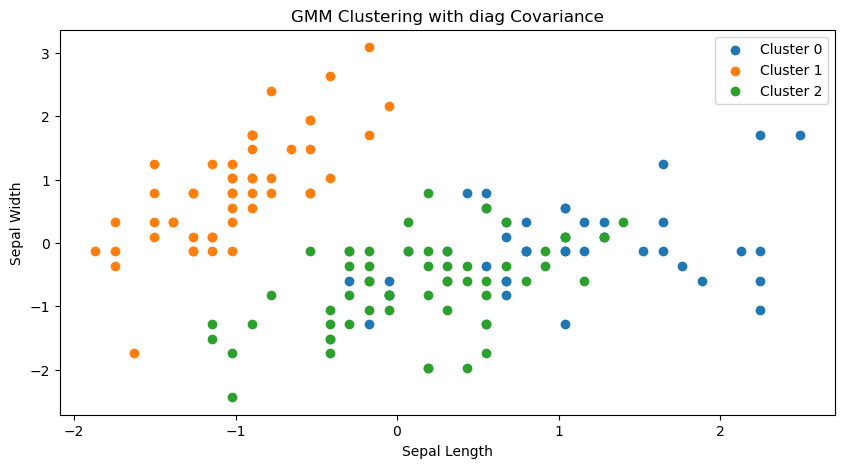

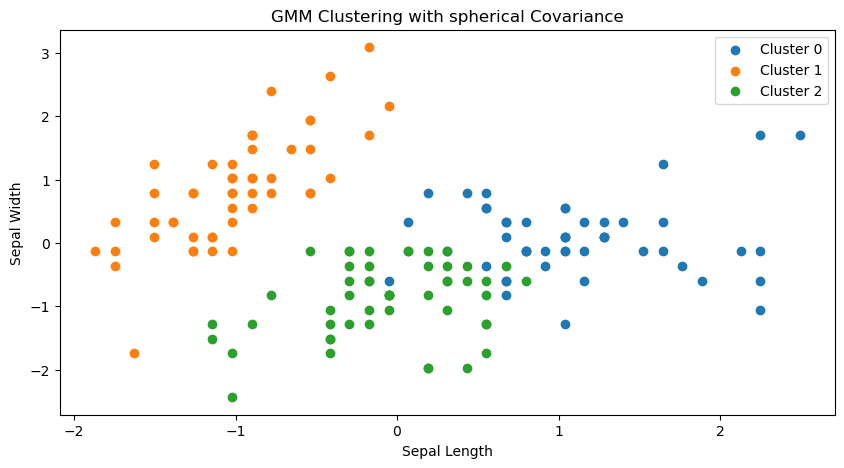

In [52]:
from sklearn.mixture import GaussianMixture

covariance_types = ['full', 'tied', 'diag', 'spherical']

for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=3, covariance_type=cov_type, random_state=42)
    gmm.fit(X_normalized)
    
    # Plotting resulting distributions
    plt.figure(figsize=(10, 5))
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    for i in range(3):
        plt.scatter(X_normalized[gmm.predict(X_normalized) == i, 0], X_normalized[gmm.predict(X_normalized) == i, 1], label=f'Cluster {i}')
    plt.legend()
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()
